<a href="https://colab.research.google.com/github/vn322/Synergy_DBM_301_CS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика EDA

In [ ]:
# импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Подготовка данных

### Датасет "Титаник"

In [ ]:
# для импорта используем функцию read_csv() 
titanic = pd.read_csv('https://raw.githubusercontent.com/vn322/Cod_future/main/train.csv')

# посмотрим на первые три записи
# последние записи можно посмотреть с помощью метода .tail()
titanic.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [ ]:
# иногда для получения более объективного представления о данных удобно использовать .sample()
# мы в данном случае мы получаем случайные пять наблюдений
titanic.sample(5)

PassengerId  Survived  Pclass                                    Name  \
868          869         0       3             van Melkebeke, Mr. Philemon   
439          440         0       2  Kvillner, Mr. Johan Henrik Johannesson   
342          343         0       2              Collander, Mr. Erik Gustaf   
735          736         0       3                    Williams, Mr. Leslie   
784          785         0       3                        Ali, Mr. William   

      Sex   Age  SibSp  Parch              Ticket   Fare Cabin Embarked  
868  male   NaN      0      0              345777   9.50   NaN        S  
439  male  31.0      0      0          C.A. 18723  10.50   NaN        S  
342  male  28.0      0      0              248740  13.00   NaN        S  
735  male  28.5      0      0               54636  16.10   NaN        S  
784  male  25.0      0      0  SOTON/O.Q. 3101312   7.05   NaN        S

In [ ]:
# посмотрим на количество непустых значений, тип данных
# статистику по типам данных и объем занимаемой памяти
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# найдем пропуски в датафрейме и просуммируем их по столбцам
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# выполним простую обработку данных
# в частности, избавимся от столбца Cabin 
titanic.drop(labels = 'Cabin', axis = 1, inplace = True)
# заполним пропуски в столбце Age медианным значением
titanic.Age.fillna(titanic.Age.median(), inplace = True)
# два пропущенных значения в столбце Embarked заполним портом Southhampton
titanic.Embarked.fillna('S', inplace = True)
# проверим результат (найдем общее количество пропусков сначала по столбцам, затем по строкам)
titanic.isnull().sum().sum()

0

### Датасет Tips

In [ ]:
# для импорта воспользуемся функцией load_dataset() с параметром 'tips'
tips = sns.load_dataset('tips')
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

Метод .info() для каждого столбца выводит количество непустных (not-null) значений и тип данных. Кроме того, этот метод считает количество столбцов каждого типа и общий объем памяти, занимаемый датасетом.

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


посмотреть количество пропусков удобнее,  с помощью последовательного применения методов .isnull() и .sum().

In [ ]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Описание

### Категориальные данные

#### Методы `.unique()` и `.value_counts()`

Методы ниже похожи на `np.unique(return_counts = True)`

In [ ]:
# применим метод библиотеки Numpy
np.unique(titanic.Survived, return_counts = True)

(array([0, 1]), array([549, 342]))

In [ ]:
# теперь воспользуемся методами библиотеки Pandas
# первый метод возращает только уникальные значения
titanic.Survived.unique()

array([0, 1])

In [ ]:
# второй - уникальные значения и их частоту
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# для получения относительной частоты, делить на общее количество строк не нужно,
# достаточно указать параметр normalize = True
titanic.Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
# короткое решение: различие можно увидеть и с помощью mean()
titanic.Survived.mean().round(2)

0.38

#### `df.describe()`

Исследование качественных переменных удобно начать с метода .describe(). Его применение к категориальным столбцам выдаст:

- общее количество значений (count)
- количество уникальных значений (unique)
- наиболее часто встречающееся значение (top)
- количество таких значений (freq)
Применим метод .describe() к столбцам Sex и Embarked.

In [ ]:
# подробное описание результатов вывода этого метода для категориальных данных
# вы найдете на странице занятия
titanic[['Sex', 'Embarked']].describe()

Sex Embarked
count    891      891
unique     2        3
top     male        S
freq     577      646

#### countplot и barplot

Seaborn

Рассмотрим два по сути однаковых графика countplot и barplot: и тот, и другой считают количество значений в каждой из категорий.Различие заключается в том, что в случае countplot, мы считаем количество наблюдений в каждой из категорий в процессе построения графика, а в случае barplot эти метрики уже должны быть посчитаны. Рассмотрим на примерах.

Проще всего countplot и barplot построить с помощью библиотеки Seaborn.

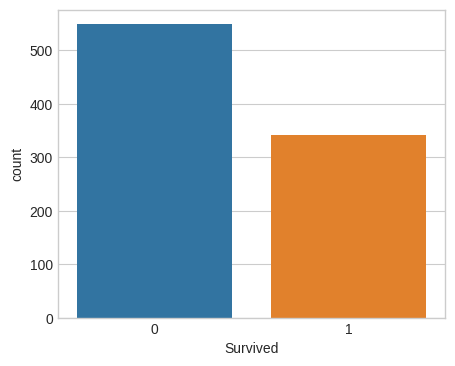

In [ ]:
# функция countplot() сама посчитает количество наблюдений в каждой из категорий
sns.countplot(x = 'Survived', data = titanic);

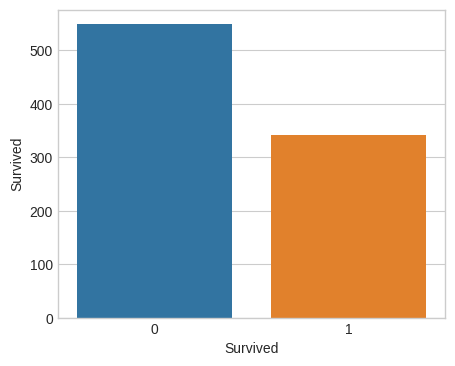

In [ ]:
# для функции barplot() количество наблюдений можно посчитать
# с помощью метода .value_counts()
sns.barplot(x = titanic.Survived, y = titanic.Survived.value_counts());

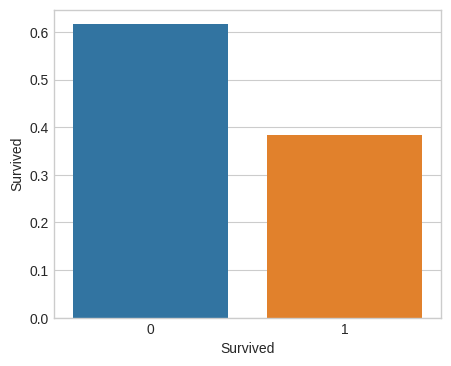

In [ ]:
# относительное количество наблюдений удобно посчитать с параметром normalize = True
sns.barplot(x = titanic.Survived, y = titanic.Survived.value_counts(normalize = True));

Matplotlib

В библиотеке Matplotlib мы можем построить только barplot (функция bar()). Отдельного инструмента для построения countplot в ней нет. Количество наблюдений мы можем найти с помощью метода .value_counts().

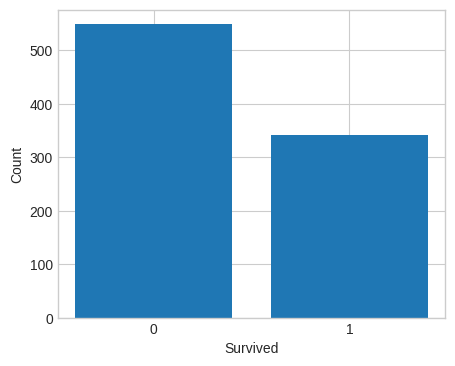

In [ ]:
# первым параметром (по оси x) передадим уникальные значения,
# вторым параметром - количество наблюдений
plt.bar(titanic.Survived.unique(), 
        titanic.Survived.value_counts(),
        # кроме того, явно пропишем значения оси x
        # (в противном случае будет указана просто числовая шкала)
        tick_label = ['0', '1'])

plt.xlabel('Survived')
plt.ylabel('Count');

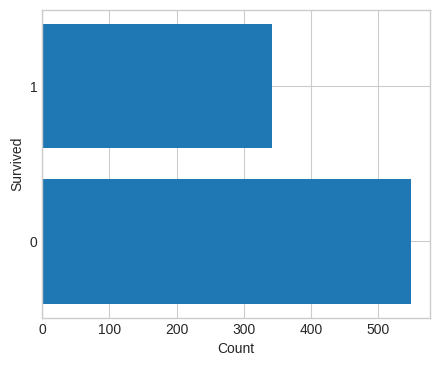

In [ ]:
# горизонтальная столбчатая диаграмма строится почти так же
plt.barh(titanic.Survived.unique(),
         titanic.Survived.value_counts(),
         tick_label = ['0', '1'])

plt.xlabel('Count')
plt.ylabel('Survived');

 воспользуемся параметром normalize = True метода .value_counts() для нахождения относительной частоты каждой категории признака.

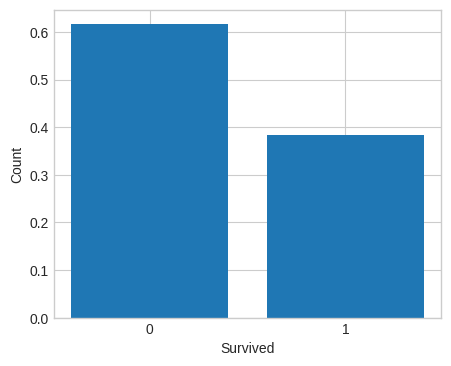

In [ ]:
# найдем относительную частоту категорий с помощью параметра normalize = True
plt.bar(titanic.Survived.unique(), 
        titanic.Survived.value_counts(normalize = True), 
        tick_label = ['0', '1'])

plt.xlabel('Survived')
plt.ylabel('Count');

Pandas

Для того чтобы построить такой график в библиотеке Pandas, вначале необходимо сгруппировать данные по столбцу Survived, затем выбрать один столбец (например, PassengerId), посчитать количество наблюдений в каждой группе через метод .count() и наконец построить столбчатую диаграмму с помощью метода .plot.bar().

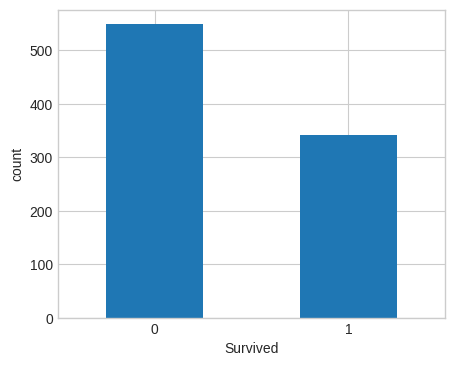

In [ ]:
# перед применением метода .plot.bar() данные необходимо сгруппировать
# параметр rot = 0 ставит деления шкалы по оси x вертикально
titanic.groupby('Survived')['PassengerId'].count().plot.bar(rot = 0)
plt.ylabel('count');

Код можно упростить, если сначала выбрать желаемый признак (столбец), затем воспользоваться методом .value_counts() и наконец применить метод .plot.bar().

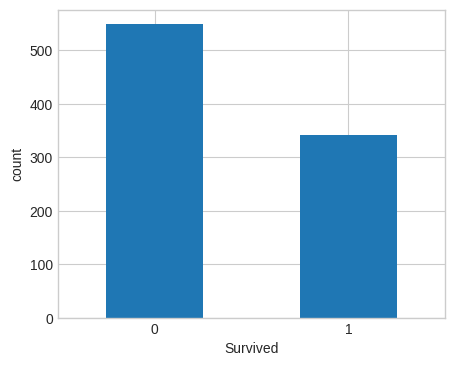

In [ ]:
# можно также сначала выбрать один столбец и затем воспользоваться методом .value_counts()
titanic.Survived.value_counts().plot.bar(rot = 0)
plt.xlabel('Survived')
plt.ylabel('count');

### Количественные данные

#### `df.describe()`

Если применить метод .describe() к количественным данным, то результат будет отличаться от рассмотренных выше категориальных признаков.

In [ ]:
# применим метод .describe() к количественным признакам
tips[['total_bill', 'tip']].describe().round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
25%         13.35    2.00
50%         17.80    2.90
75%         24.13    3.56
max         50.81   10.00

- count — количество наблюдений
- mean — среднее арифметическое
- std или standard deviation — среднее квадратическое отклонение
- min и max — минимальное и максимальное значения, а также
-  25%, 50% и 75% — первый, второй (он же медиана) и третий квартили

Мы уже знаем, как находить среднее арифметическое и среднее квадратическое отклонение. Проблема же этих метрик заключается в том, что они сильно подвержены выбросам.


В этом смысле медиана дает более надежную оценку среднего при наличии выбросов.

Статистические методы и алгоритмы, устойчивые к выбросам и менее зависимые от предположений (assumptions) модели, еще называют робастными (robust statistics).

Медианой называется число, которое находится в середине упорядоченного от меньшего к большему набора чисел. В случае нечетного количества чисел, мы просто берем то значение, которое находится посередине.

Медиану можно также определить как значение, которое наши данные (или случайная величина) не превышают с вероятностью 50 процентов (отсюда знак % в выводе метода .describe()).

Аналогично можно найти, например, значение, которое величина не будет превышать с вероятностью 25 или 75 процентов. Такие значения будут называться первым и третьим квартилями (quartile, от латинского — quarta, «четверть»), потому что они делят распределение на четыре части. По-английски первый, второй и третий квартили принято обозначать как Q1, Q2 и Q3.

Кроме этого, можно найти децили (deciles, делят распределение на десять частей). Наконец, если мы хотим найти конкретное значение, то будем искать квантиль (quantile). Если вероятность выражена в процентах, то квантиль принято называть процентилем или перцентилем (percentile).

Вывести конкретный процентиль в методе .describe() можно с помощью параметра percentiles.

In [ ]:
# выведем второй и четвертый дециль, а также 99-й процентиль
tips[['total_bill', 'tip']].describe(percentiles = [0.2, 0.4, 0.99]).round(2)

total_bill     tip
count      244.00  244.00
mean        19.79    3.00
std          8.90    1.38
min          3.07    1.00
20%         12.64    2.00
40%         16.22    2.48
50%         17.80    2.90
99%         48.23    7.21
max         50.81   10.00

Проанализировав приведенные выше метрики получим.

Медианное значение обоих признаков чуть ниже среднего арифметического
40 процентов чаевых были ниже 2,48 доллара
99 процентов чеков были ниже 48,23 доллара
Рассмотрим еще одну очень полезную меру разброса.

Межквартильный размах
Межквартильный размах (interquartile range) — робастная (устойчивая к выбросам) альтернатива среднему квадратическому отклонению. Рассчитывается как разница между третьим (Q3) и первым (Q1) квартилями.

#### Гистограмма

для построения гистограммы мы делим  данные на интервалы (bins) и считаем, сколько наблюдений попало в каждый из них.

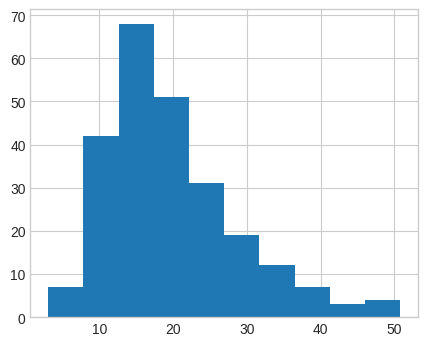

In [ ]:
# гистограмма распределения размера чека с помощью библиотеки Matplotlib
plt.hist(tips.total_bill, bins = 10);

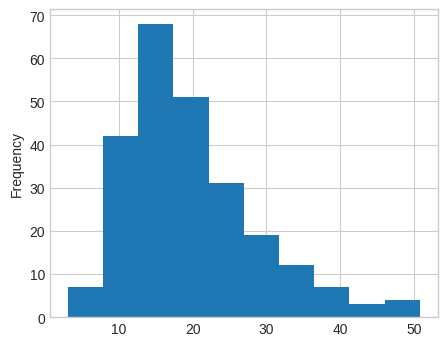

In [ ]:
# такую же гистограмму можно построить с помощью Pandas
tips.total_bill.plot.hist(bins = 10);

Распределение скошено вправо (skewed right или positively skewed), т.е. в нем есть несколько чеков на достаточно большую сумму, которые и создают правый «хвост».

Хотя на графике эта особенность распределения более очевидна, к такому же выводу мы могли прийти проанализировав разницу между средним арифметическим и медианой.

Когда медиана меньше среднего арифметического, мы наблюдаем скошенное вправо распределение.

В целом соотношение скошенности распределения со средним арифметическом, медианой и модой приведено на графике ниже.



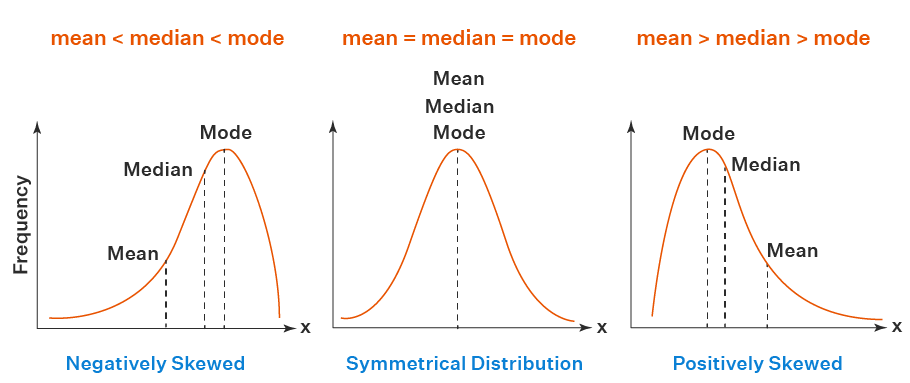

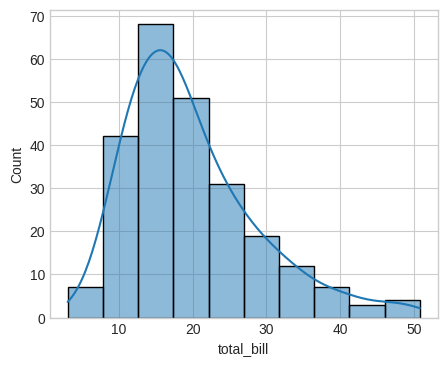

In [ ]:
# в библиотеке Seaborn мы указываем источник данных, что будет на оси x и количество интервалов
# параметр kde = True добавляет кривую плотности распределения
sns.histplot(data = tips, x = 'total_bill', bins = 10, kde = True);

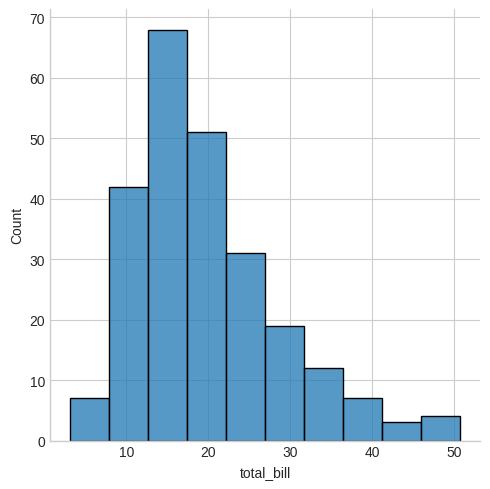

In [ ]:
# функция displot() - еще один способ построить гистограмму в Seaborn
# для этого используется параметр по умолчанию kind = 'hist'
sns.displot(data = tips, x = 'total_bill', kind = 'hist', bins = 10);

In [ ]:
# Plotly, как уже было сказано, позволяет построить интерактивную гистограмму
# параметр text_auto = True выводит количество наблюдений в каждом интервале
px.histogram(tips, x = 'total_bill', nbins = 10, text_auto = True)

#### График плотности

 график плотности позволяет визуализировать непрерывное случайное распределение.  
 
 в Seaborn значение параметра kde расшифровывается как kernel density estimation (ядерная оценка плотности), непараметрический способ оценки плотности случайной величины.

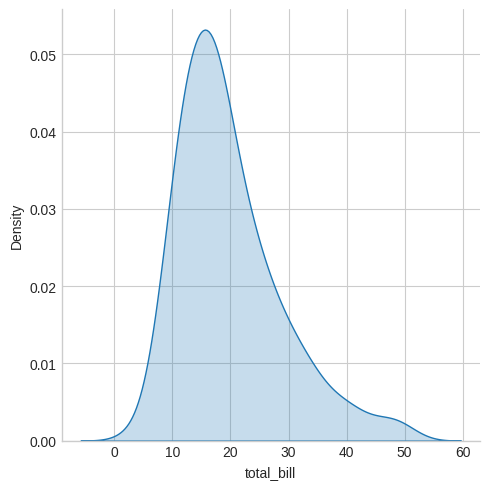

In [ ]:
# используем функцию displot(), которой передадим датафрейм tips,
# какой признак вывести по оси x, тип графика kind = 'kde'
# а также заполним график цветом через fill = True
sns.displot(tips, x = 'total_bill', kind = 'kde', fill = True);

#### boxplot

boxplot строится на проранжированных по возрастанию данных. Теперь обратим внимание на сам «ящик» (box):

- левый край отражает первый квартиль (Q1) или 25-тый процентиль (25%)
- вертикальная полоса посередине — медиана, второй квартиль (Q2) или 50-тый процентиль (50%)
- правый край, соответственно, третий квартиль (Q3) или 75-тый процентиль (75%)
- ширина ящика равна межквартильному размаху (IQR)
- усы (whiskers), то есть линии с ромбами на концах, отражают разброс данных за пределами IQR и рассчитываются как функция от этого значения.
- данные, которые находятся за пределами этого диапазона, считаются выбросами (outliers).

Seaborn

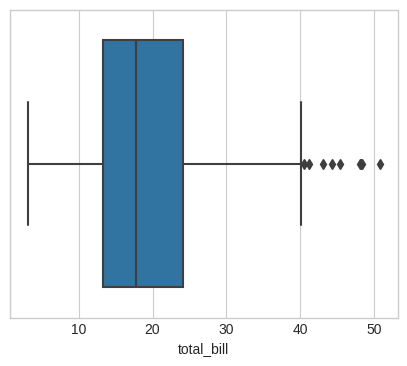

In [ ]:
# функции boxplot() достаточно передать параметр x
# с данными необходимого столбца
sns.boxplot(x = tips.total_bill);

Plotly

In [ ]:
# если передать нужный нам столбец в параметр x,
# то мы получим горизонтальный boxplot
px.box(tips, x = 'total_bill')

In [ ]:
# если в y, то вертикальный
px.box(tips, y = 'total_bill')

Matplotlib и Pandas

In [ ]:
# plt.boxplot(tips.total_bill);

In [ ]:
# tips.total_bill.plot.box();

#### Гистограмма и boxplot

Matplotlib и Seaborn

Гистограмма, с одной стороны, и boxplot, с другой, имеют свои достоинства и недостатки. В частности,

- гистограмма хорошо выявляет полимодальность (то есть несколько мод, «горбиков» в данных), при этом она сильно зависит от выбранного количества интервалов и не показывает выбросы.
- boxplot наоборот, показывает выбросы, но не справляется с полимодальностью.

Поэтому часто бывает удобно сразу построить оба графика распределения данных. Первый подобный график мы построили при изучении нормального распределения. Теперь у нас больше знаний, и мы лучше поймем суть каждого из них.

Вначале построим совмещенный график с помощью двух библиотек: Matplotlib и Seaborn. Первую мы будем использовать для создания подграфиков (рассмотрены ниже) и подписей, вторую — для самих визуализаций.

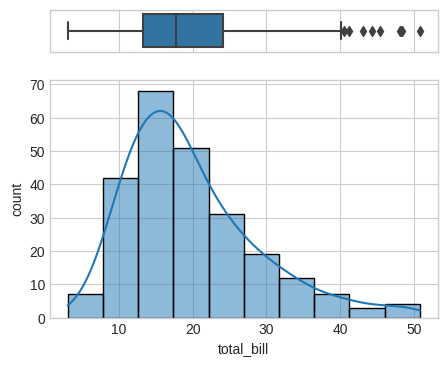

In [ ]:
# создадим два подграфика ax_box и ax_hist
# кроме того, укажем, что нам нужны:
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

# затем создадим графики, указав через параметр ax в какой подграфик поместить каждый из них
sns.boxplot(x = tips['total_bill'], ax = ax_box)
sns.histplot(x = tips['total_bill'], ax = ax_hist, bins = 10, kde = True)

# добавим подписи к каждому из графиков через метод .set()
ax_box.set(xlabel = '') # пустые кавычки удаляют подпись (!)
ax_hist.set(xlabel = 'total_bill')
ax_hist.set(ylabel = 'count')

# выведем результат
plt.show()

Plotly

В Plotly такой график можно построить с меньшим количеством кода.

In [ ]:
# воспользуемся функцией histogram()
px.histogram(tips, # передав ей датафрейм,
             x = 'total_bill', # конкретный столбец для построения данных,
             nbins = 10, # количество интервалов в гистограмме
             marginal = 'box') # и тип дополнительного графика

## Нахождение отличий

### Два категориальных признака

возьмем случай двух категориальных признаков. Например, мы хотим понять насколько выживаемость пассажира (целевая переменная) зависит от класса, которым он путешествовал.


В первую очередь стоит визуально оценить, есть ли такое различие или нет. Для этого подойдут столбчатые диаграммы, где мы либо располагаем два столбца целевого признака рядом друг с другом (grouped), либо делаем один столбец и разбиваем его на две части (stacked).

Библиотека Seaborn
Начнем с того, что построим несколько counplots/barplots в библиотеке Seaborn с помощью функции countplot() и параметра hue.

#### countplot и barplot

Seaborn

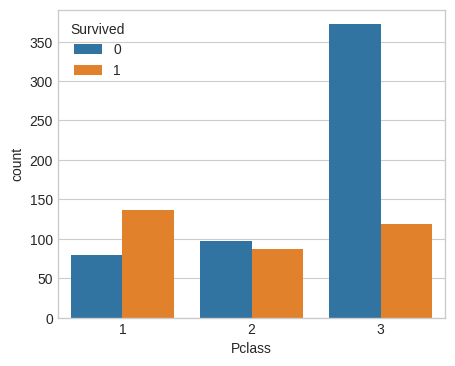

In [ ]:
# создадим grouped countplot, где по оси x будет класс, а по оси y - количество пассажиров
# в каждом классе данные разделены на погибших (0) и выживших (1)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic);

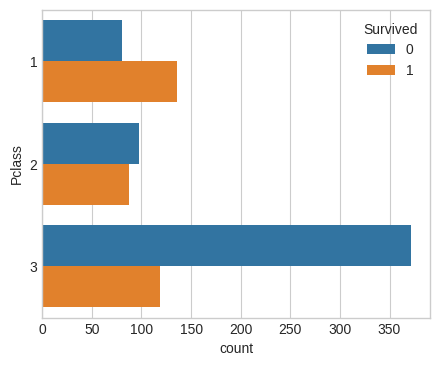

In [ ]:
# горизонтальный countplot получится,
# если передать данные о классе пассажира в переменную y
sns.countplot(y = 'Pclass', hue = 'Survived', data = titanic);

Для создания таких графиков мы также можем использовать более универсальную функцию catplot(). Передадим ей все те же параметры, что и функции countplot(), а также параметр kind = ‘count’, который и сообщит, что мы хотим построить именно countplot.

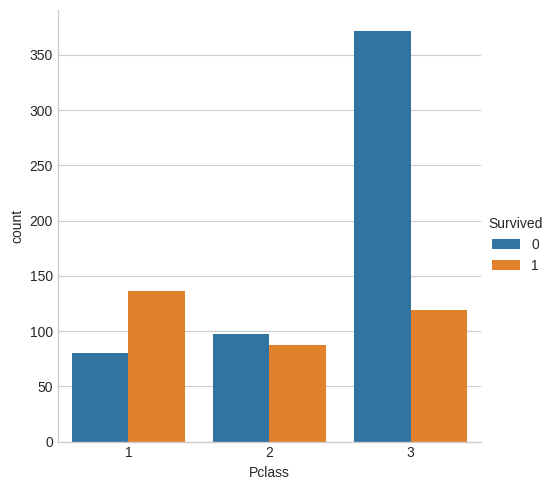

In [ ]:
# передадим функции catplot() параметр kind = 'count' для создания графика countplot
sns.catplot(x = 'Pclass', hue = 'Survived', data = titanic, kind = 'count');

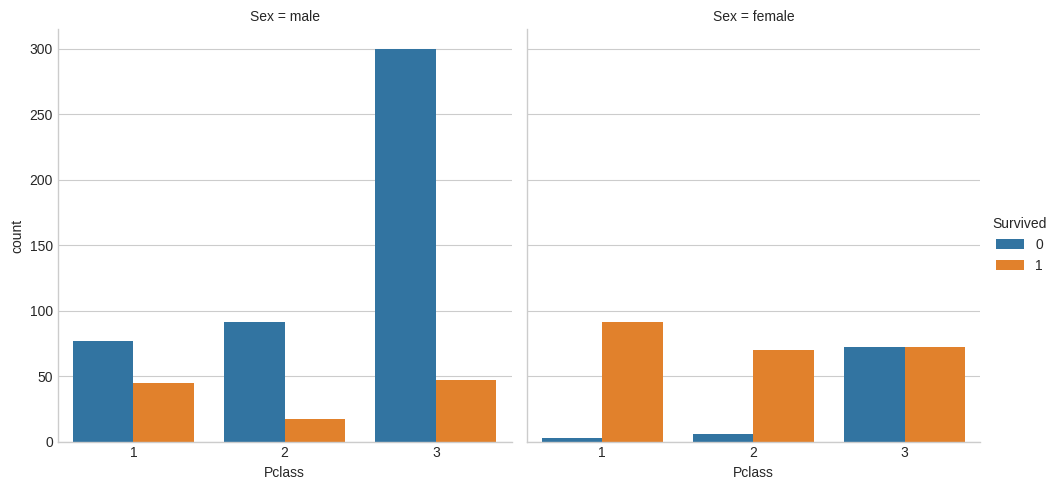

In [ ]:
# добавим еще один признак (пол) через параметр col
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = titanic);

На основе графиков выше видно, что класс пассажира имеет большое значение для определения его виживаемости. При этом пол также оказал влияние. Например, в третьем классе большая часть мужчин погибла, в то время как среди женщин, количество выживших и не выживших примерно одинаковое.

Plotly

Для построения графика countplot используем функцию px.histogram() (для barplot подойдет px.bar()). Начнем с варианта, когда разбитые по какому-либо признаку столбцы стоят рядом друг с другом (grouped).

In [ ]:
px.histogram(titanic, # возьмем данные
             x = 'Pclass', # диаграмму будем строить по столбцу Pclass
             color = 'Survived', # с разбивкой на выживших и погибших
             barmode = 'group', # разделенные столбцы располагаются рядом друг с другом
             text_auto = True, # выведем количество наблюдений в каждом столбце
             title = 'Survival by class' # также добавим заголовок
             )

Теперь выведем вариант, когда каждый столбец диаграммы разделен на две части (stacked). Так как мы будем вручную корректировать подписи к графику и расстояние между столбцами, необходимо использовать объектно-ориентированный подход.

In [ ]:
# создадим объект fig, в который поместим столбчатую диаграмму
fig = px.histogram(titanic,
                   x = 'Pclass',
                   color = 'Survived',
                   barmode = 'stack', # каждый столбец класса будет разделен по признаку Survived
                   text_auto = True)

# применим метод .update_layout к объекту fig
fig.update_layout(
    title_text = 'Survival by class', # заголовок
    xaxis_title_text = 'Pclass', # подпись к оси x
    yaxis_title_text = 'Count', # подпись к оси y
    bargap = 0.2, # расстояние между столбцами

    # подписи классов пассажиров на оси x
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3],
        ticktext = ['Class 1', 'Class 2', 'Class 3']
    )
)

fig.show()

Теперь разобьем данные по трем категориальным переменным: полу, классу и выживаемости.



In [ ]:
# используем новый параметр facet_col = 'Sex'
px.histogram(titanic,
             x = 'Pclass',
             color = 'Survived',
             facet_col = 'Sex',
             barmode = 'group',
             text_auto = True,
             title = 'Survival by class and gender')

Более того, мы можем добавить еще один категориальный признак, порт посадки пассажира (Embarked).

In [ ]:
# используем одновременно параметры facet_col и facet_row
px.histogram(titanic,
             x = 'Pclass',
             color = 'Survived',
             facet_col = 'Embarked',
             facet_row = 'Sex',
             barmode = 'group',
             text_auto = True,
             title = 'Survival by class, gender and port of embarkation')

 нужно следить за тем, чтобы объем предоставляемой информации не ухудшал информативности графиков.

#### Таблица сопряженности

Таблица сопряженности (contingency table) позволяет количественно измерить зависимость одной категориальной переменной от другой. Например, количественно оценим зависимость выживаемости от класса пассажира. Вначале оценим абсолютное количество наблюдений.


Для создания таблиц сопряженности в библиотеке Pandas используется функция pd.crosstab().

Абсолютное количество наблюдений

In [ ]:
# создадим таблицу сопряженности
# в параметр index мы передадим данные по классу, в columns - по выживаемости
pclass_abs = pd.crosstab(index = titanic.Pclass, columns = titanic.Survived)

# создадим названия категорий класса и выживаемости
pclass_abs.index = ['Class 1', 'Class 2', 'Class 3']
pclass_abs.columns = ['Not survived', 'Survived']

# выведем результат
pclass_abs

Not survived  Survived
Class 1            80       136
Class 2            97        87
Class 3           372       119

Теперь для каждого класса мы видим количество выживших и количество погибших. На основе таблицы сопряженности очень удобно строить столбчатую диаграмму (можно использовать график barplot, а не countplot, потому что количество значений в каждой категории уже посчитано).

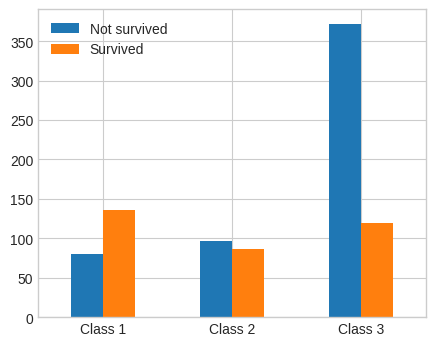

In [ ]:
# построим grouped barplot в библиотеке Pandas
# rot = 0 делает подписи оси х вертикальными
pclass_abs.plot.bar(rot = 0);

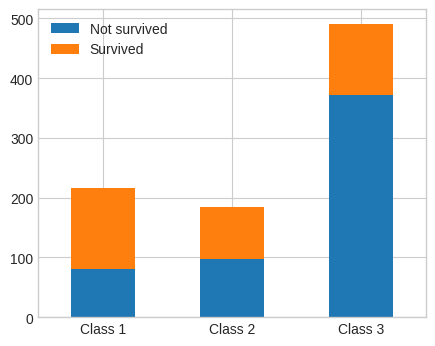

In [ ]:
# параметр stacked = True делит каждый столбец класса на выживших и погибших
pclass_abs.plot.bar(rot = 0, stacked = True);

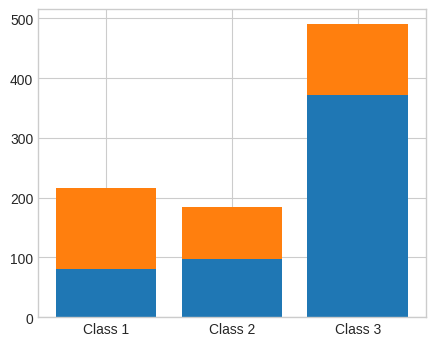

In [ ]:
# в Matplotlib вначале создадим barplot для одной (нижней) категории
plt.bar(pclass_abs.index, pclass_abs['Not survived'])
# затем еще один barplot для второй (верхней), указав нижнуюю в параметре bottom
plt.bar(pclass_abs.index, pclass_abs['Survived'], bottom = pclass_abs['Not survived']);

Таблица сопряженности вместе с суммой


С помощью параметра margins = True мы можем вывести сумму наблюдений по каждой строке и каждому столбцу (эти показатели еще называют маргинальными частотами, marginal frequencies).

In [ ]:
# для подсчета суммы по строкам и столбцам используется параметр margins = True
pclass_abs = pd.crosstab(index = titanic.Pclass,
                         columns = titanic.Survived,
                         margins = True)

# новой строке и новому столбцу с суммами необходимо дать название (например, Total)
pclass_abs.index = ['Class 1', 'Class 2', 'Class 3', 'Total']
pclass_abs.columns = ['Not survived', 'Survived', 'Total']
pclass_abs

Not survived  Survived  Total
Class 1            80       136    216
Class 2            97        87    184
Class 3           372       119    491
Total             549       342    891

Относительное количество наблюдений

Для получения относительного количества наблюдений (относительных частот) следует использовать параметр normalize. Так как нам важно понимать долю выживших и долю погибших, укажем normalize = 'index'. В этом случае каждое значение будет разделено на общее количество наблюдений в строке.

In [ ]:
# так как нам важно понимать долю выживших и долю погибших, укажем normalize = 'index'
# в этом случае каждое значение будет разделено на общее количество наблюдений в строке (!)
pclass_rel = pd.crosstab(index = titanic.Pclass,
                         columns = titanic.Survived,
                         normalize = 'index')

pclass_rel.index = ['Class 1', 'Class 2', 'Class 3']
pclass_rel.columns = ['Not survived', 'Survived']
pclass_rel

Not survived  Survived
Class 1      0.370370  0.629630
Class 2      0.527174  0.472826
Class 3      0.757637  0.242363

Если бы в индексе (в строках) была выживаемость, а в столбцах — классы, то логично было бы использовать параметр normalize = 'columns' для деления на сумму по столбцам.

In [ ]:
# если бы в индексе (в строках) была выживаемость, а в столбцах - классы, 
# то логично было бы использовать параметр normalize = 'columns' для деления на сумму по столбцам
pclass_rel_T = pd.crosstab(index = titanic.Survived,
                           columns = titanic.Pclass,
                           normalize = 'columns')

pclass_rel_T.index = ['Not survived', 'Survived']
pclass_rel_T.columns = ['Class 1', 'Class 2', 'Class 3']
pclass_rel_T

Class 1   Class 2   Class 3
Not survived  0.37037  0.527174  0.757637
Survived      0.62963  0.472826  0.242363

Теперь на stacked barplot мы видим доли выживших в каждом из классов.

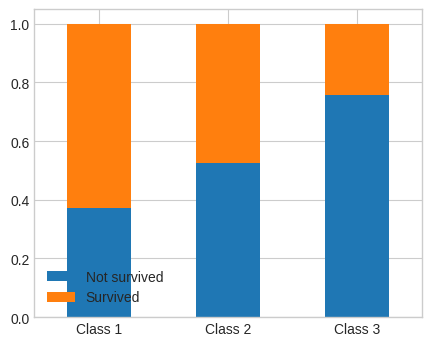

In [ ]:
# теперь на stacked barplot мы видим доли выживших в каждом из классов
pclass_rel.plot.bar(rot = 0, stacked = True).legend(loc = 'lower left');

### Количественный и категориальный признаки

#### rcParams

Прежде чем продолжить, давайте посмотрим, как мы можем задать размер для всех (или почти всех) последующих графиков в ноутбуке. Так нам не придется вручную менять размер каждой визуализации.

В библиотеке Matplotlib и связанных с ней библиотеках (например, Seaborn) есть так называемые параметры конфигурации среды (runtime configuration parameters), то есть параметры, которые используются по умолчанию при создании графиков.

Эти параметры и их значения содержатся в словаре, к которому можно получить доступ через атрибут rcParams библиотеки Matplotlib.



In [ ]:
# импортируем всю библиотеку Matplotlib
import matplotlib

# и посмотрим, какой размер графиков (ключ figure.figsize) установлен по умолчанию
matplotlib.rcParams['figure.figsize']

[5.0, 4.0]

Изменить эти параметры можно, обновив значение словаря rcParams по соответствующему ключу. Передадим новое значение размера по ключу figure.figuresize.

In [ ]:
# обновим этот параметр через прямое внесение изменений в значение словаря
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['figure.figsize']

[7.0, 5.0]

Также можно воспользоваться функцией sns.set() или, что то же самое, sns.set_theme().

In [ ]:
# изменим размер обновив словарь в параметре rc функции sns.set()
sns.set(rc = {'figure.figsize' : (8, 5)})

# посмотрим на результат
matplotlib.rcParams['figure.figsize']

[8.0, 5.0]

Теперь все последующие графики в библиотеках Matplotlib, Seaborn и Pandas будут иметь размеры восемь на пять дюймов. Вернемся к исследованию переменных.

In [ ]:
# весь словарь с параметрами доступен по атрибуту rcParams
# matplotlib.rcParams

#### Гистограммы

Когда у нас есть одна количественная и одна категориальная переменные, для их визуализации проще всего построить две наложенные друг на друга гистограммы. 

Посмотрим, различается ли распределение возраста выживших и погибших пассажиров Титаника.

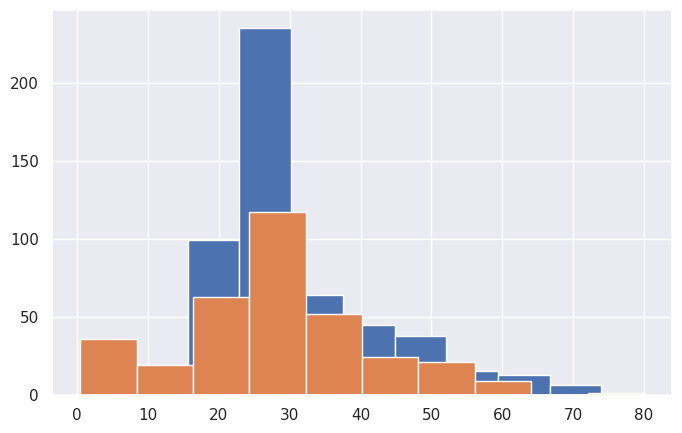

In [ ]:
# выведем две гистограммы на одном графике в библиотеке Matplotlib
# отфильтруем данные по погибшим и выжившим и построим гистограммы по столбцу Age
plt.hist(x = titanic[titanic['Survived'] == 0]['Age'])
plt.hist(x = titanic[titanic['Survived'] == 1]['Age']);

Теперь посмотрим, зависит ли распределение возраста от пола пассажира.

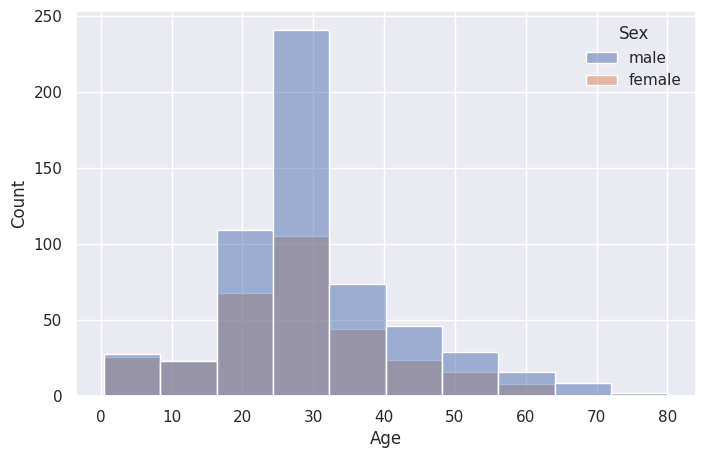

In [ ]:
# сделаем то же самое в библиотеке Seaborn
# в x мы поместим количественный признак, в hue - категориальный
sns.histplot(x = 'Age', hue = 'Sex', data = titanic, bins = 10);

In [ ]:
# в Plotly количественный признак помещается в x, категориальный - в color
px.histogram(titanic, x = 'Age', color = 'Sex', nbins = 8, text_auto = True)

Сравнение двух распределений может быть не вполне корректным, если размер выборок существенно различается. Например, в нашем случае количество мужчин и женщин на борту далеко не одинаково.

разное количество элементов в выборках

In [ ]:
# сравним количество мужчин и женщин на борту
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

Исправить ситуацию может параметр density = True.

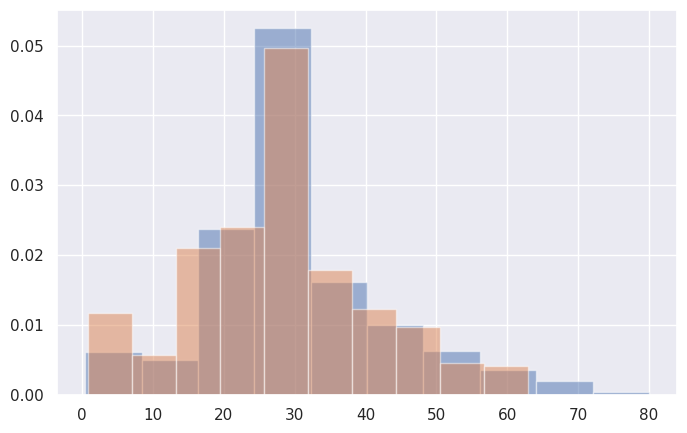

In [ ]:
# создадим две гистограммы с параметров density = True
# параметр alpha отвечает за прозрачность каждой из гистограмм
plt.hist(x = titanic[titanic['Sex'] == 'male']['Age'], density = True, alpha = 0.5)
plt.hist(x = titanic[titanic['Sex'] == 'female']['Age'], density = True, alpha = 0.5);

В этом случае гистограмма показывает плотность вероятности, а ее общая площадь всегда равна единице. Как следствие, мы можем адекватно сравнивать распределения между собой.

#### Графики плотности

С другой стороны, для плотности вероятности есть отдельный график, density plot. Площадь под кривой такого графика также всегда равна единице. Воспользуемся функцией .displot() с параметром kde = True.

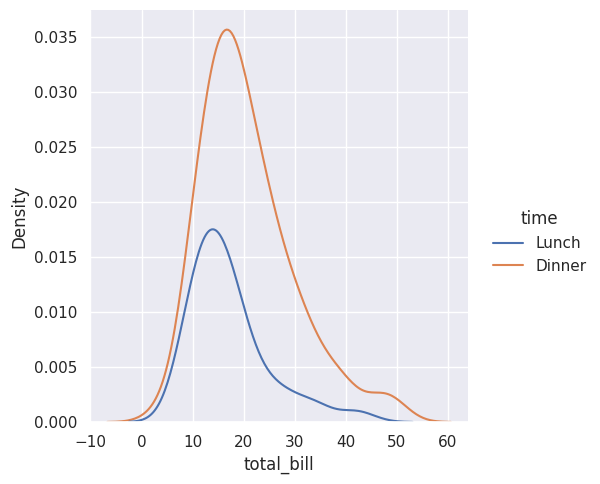

In [ ]:
# построим графики плотности распределений суммы чека в обеденное и вечернее время
sns.displot(tips, x = 'total_bill', hue = 'time', kind = 'kde');

Из-за особенностей расчета графика kde мы можем получить «неестественные значения». Например, на диаграмме выше встречаются отрицательные значения чека. В реальности такого быть не может.

Избавиться от таких значений можно с помощью параметра clip, который задает диапазон значений.

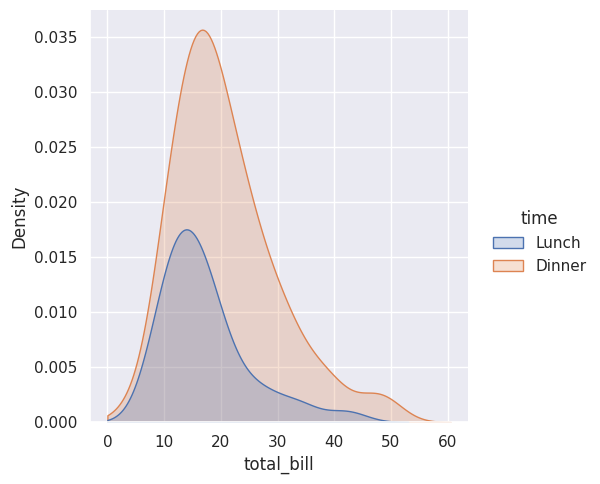

In [ ]:
# зададим границы диапазона от 0 до 70 долларов через clip = (0, 70)
# дополнительно заполним цветом пространство под кривой с помощью fill = True
sns.displot(tips, x = 'total_bill', hue = 'time', kind = 'kde', clip = (0, 70), fill = True);

#### boxplots

Для сравнения распределений количественной переменной, разбитой по какому-либо категориальному признаку, также очень удобно использовать несколько графиков boxplot (side-by-side boxplots).

Построим такие графики в библиотеках Seaborn и Plotly. Вначале посмотрим, как различается сумма чека по дням недели.

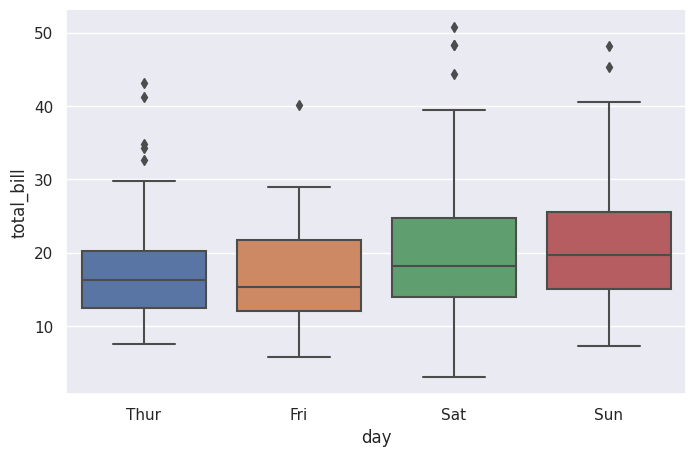

In [ ]:
# посмотрим, как различается сумма чека по дням недели
sns.boxplot(x = 'day', y = 'total_bill', data = tips);

Что можно сказать про эти распределения:

- Медианный чек выше по воскресеньям
- Самый широкий диапазон суммы по чеку наблюдается в субботу, в пятницу же наоборот разброс наименьший
- Выбросы присутствуют только в верхних значениях распределения


Теперь посмотрим, как различается сумма чека в обеденное и вечернее время.

In [ ]:
# а также в зависимости от того, обед это или ужин
px.box(tips, x = 'time', y = 'total_bill', points = 'all')

Ожидаемо, как разброс, так и медианное значение меньше в обеденное время.

Дополнительно замечу, что с помощью параметра points = ‘all’ в библиотеке Plotly для каждого распределения мы построили график, который называется stripplot. Он, в частности, показывает, что гостей за ужином бывает существенно больше. Об этом графике мы дополнительно поговорим чуть ниже.

#### Гистограммы и boxplots

Гистограммы и boxplots можно совместить. Сделать это проще всего в Plotly.

In [ ]:
px.histogram(tips,
             x = 'total_bill', # количественный признак
             color = 'sex', # категориальный признак
             marginal = 'box') # дополнительный график: boxplot

#### stripplot, violinplot

Более редкими типами графиков для визуализации количественных распределений являются stripplot и violinplot. Первый график, stripplot, как мы уже видели выше, визуализирует сами наблюдения.

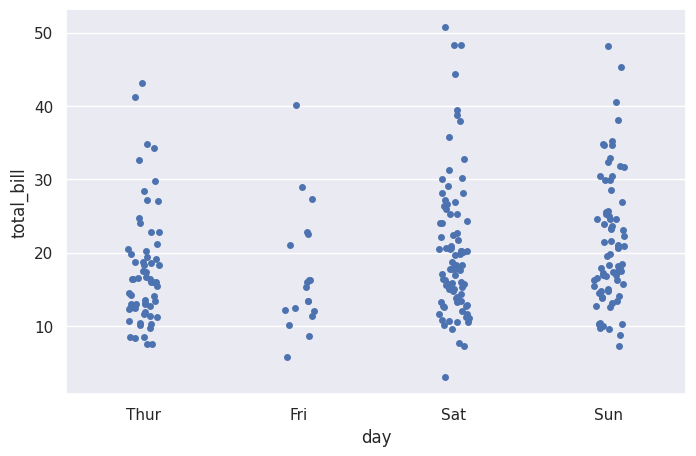

In [ ]:
# по сути, stripplot - это точечная диаграмма (scatterplot),
# в которой одна из переменных категориальная
sns.stripplot(x = 'day', y = 'total_bill', data = tips);

График stripplot можно построить как с помощью приведенной в примере выше функции sns.stripplot(), так и с помощью функции sns.catplot() с параметром kind = ‘strip’.

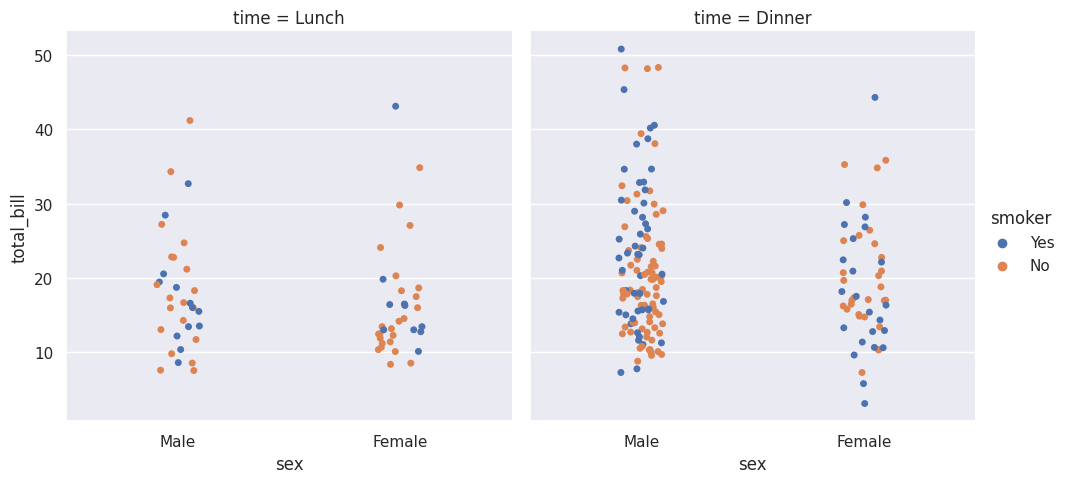

In [ ]:
# с помощью sns.catplot() мы можем вывести распределение количественной переменной (total_bill)
# в разрезе трех качественных: статуса курильщика, пола и времени приема пищи
sns.catplot(x = 'sex', y = 'total_bill', hue = 'smoker', col = 'time', data = tips, kind = 'strip');

Хотя stripplot достаточно информативен сам по себе, его очень удобно применять совместно с boxplot (как мы это делали выше).

График violinplot (от англ. violin, «скрипка») представляет собой комбинацию boxplot и графика плотности.

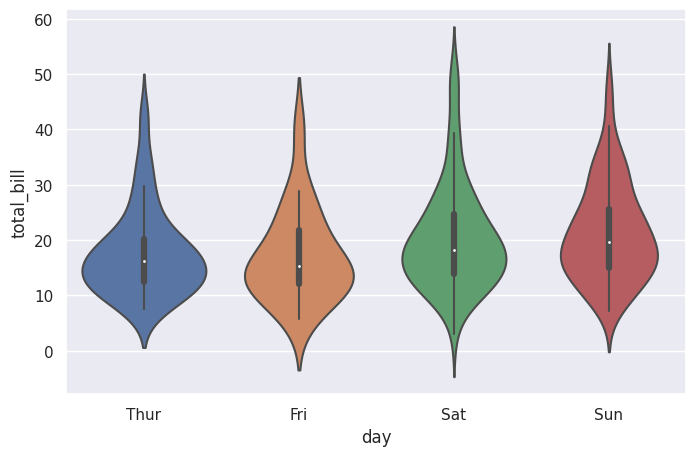

In [ ]:
# построим violinplot для визуализации распределения суммы чека по дням недели
sns.violinplot(x = 'day', y = 'total_bill', data = tips);

Внутри каждого из violinplot находится миниатюрный boxplot, который помогает более точно оценить параметры распределения.

### Преобразование данных

Иногда так бывает, что для повышения читаемости графика, данные сначала нужно преобразовать.

#### Логарифмическая шкала

In [ ]:
# соберем данные о продажах
products = ['Phone', 'TV', 'Laptop', 'Desktop', 'Tablet']
sales = [800, 4, 550, 500, 3]

Предположим, что в этих данных нет ошибки и было действительно продано четыре телевизора и три планшета. На графике эти позиции из-за сильно различающегося масштаба будут нулевыми.

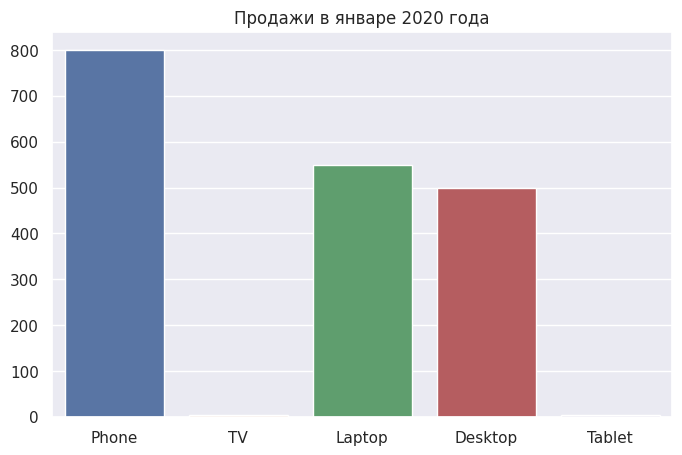

In [ ]:
# отразим продажи с помощью столбчатой диаграммы
sns.barplot(x = products, y = sales)
plt.title('Продажи в январе 2020 года');

Для того чтобы эти продажи все-таки были видны, можно перевести ось y в логарифмическую шкалу.

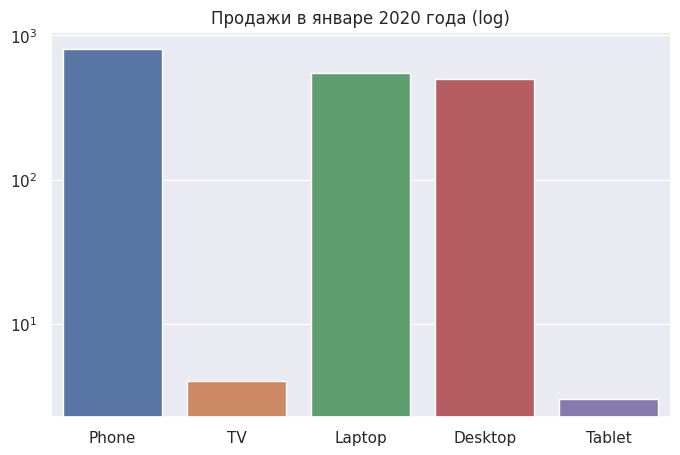

In [ ]:
# теперь выведем эти же данные, но по логарифмической шкале
sns.barplot(x = products, y = sales)
plt.title('Продажи в январе 2020 года (log)')
plt.yscale('log');

#### Границы по оси y

Например баллы на последней аттестации для покинувших и продолжающих работать сотрудников различие не велико.

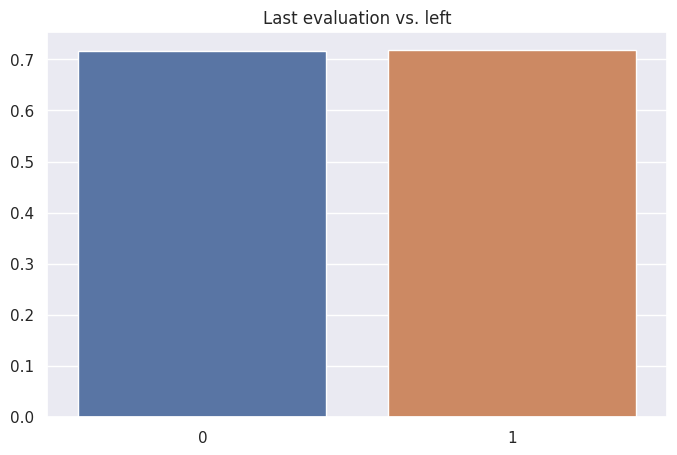

In [ ]:
eval_left = [0.715473, 0.718113]

# построим столбчатую диаграмму,
# для оси x - выведем строковые категории, для y - доли покинувших компанию сотрудников
sns.barplot(x = ['0', '1'], y = eval_left)
plt.title('Last evaluation vs. left');

Иногда для наглядности бывает полезно ограничить диапазон значений по оси y.

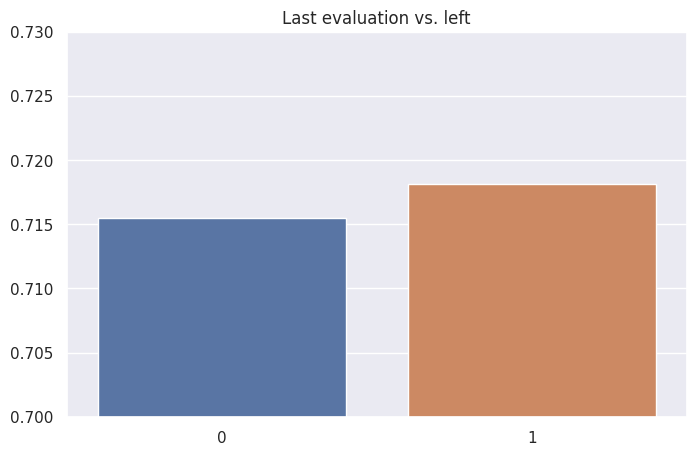

In [ ]:
sns.barplot(x = ['0', '1'], y = eval_left)
plt.title('Last evaluation vs. left')

# для ограничения значений по оси y можно использовать функцию plt.ylim()
plt.ylim(0.7, 0.73);

## Выявление взаимосвязи

### Линейный график

Базовым способом визуализации двух количественных переменных является линейный график (linear plot). Построить его можно с помощью функции plt.plot() библиотеки Matplotlib.

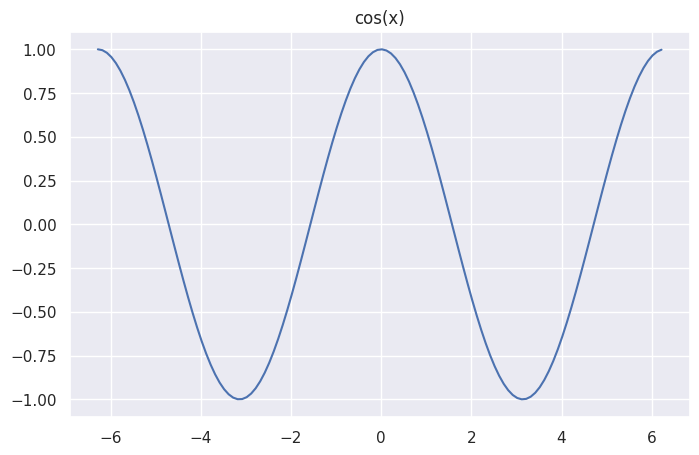

In [ ]:
# создадим последовательность от -2пи до 2пи
# с интервалом 0,1
x = np.arange(-2*np.pi, 2*np.pi, 0.1)

# сделаем эту последовательность значениями по оси x,
# а по оси y выведем функцию косинуса
plt.plot(x, np.cos(x))
plt.title('cos(x)');

### Точечная диаграмма

Еще один базовый график — уже знакомая нам точечная диаграмма (scatter plot). Ее удобно использовать, когда одна переменная не имеет строгой зависимости от другой. Воспользуемся функцией plt.scatter() библиотеки Matplotlib.

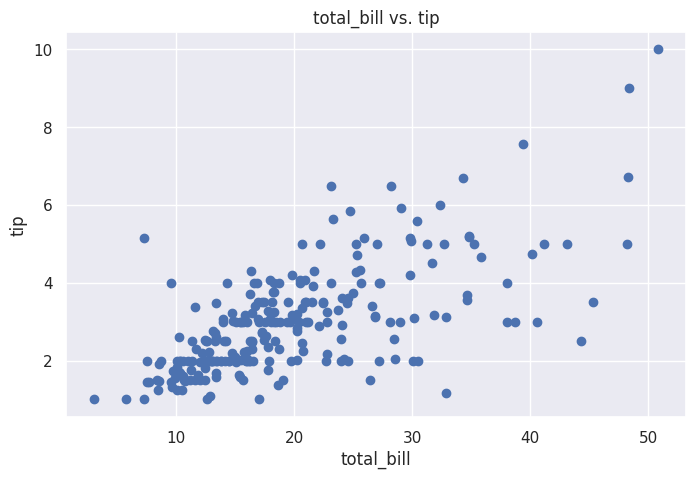

In [ ]:
# построим точечную диаграмму в библиотеке Matplotlib
plt.scatter(tips.total_bill, tips.tip)
plt.xlabel('total_bill')
plt.ylabel('tip')
plt.title('total_bill vs. tip');

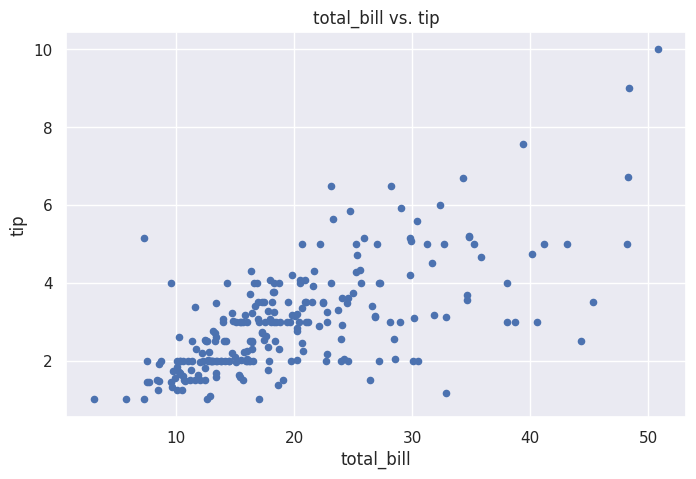

In [ ]:
# перед созданием этого графика в Pandas принудительно удалим
# предупреждения и сообщения об ошибках
# (в Colab появляется предупреждение, связанное с параметром c (color))
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# воспользуемся методом .plot.scatter()
tips.plot.scatter('total_bill','tip')
plt.title('total_bill vs. tip');

На графиках выше мы видим, что в среднем с ростом суммы чека растет и размер чаевых (другими словами, взаимосвязь прослеживается).

При этом мы видим гетероскедастичность (различную изменчивость) данных, когда при небольшом чеке диапазон чаевых меньше, чем когда сумма чека увеличивается.



В точечной диаграмме можно учесть и категориальный признак. Например, посмотрим, есть ли различие во взаимосвязи между суммой чека и размером чаевых в зависимости от времени дня.

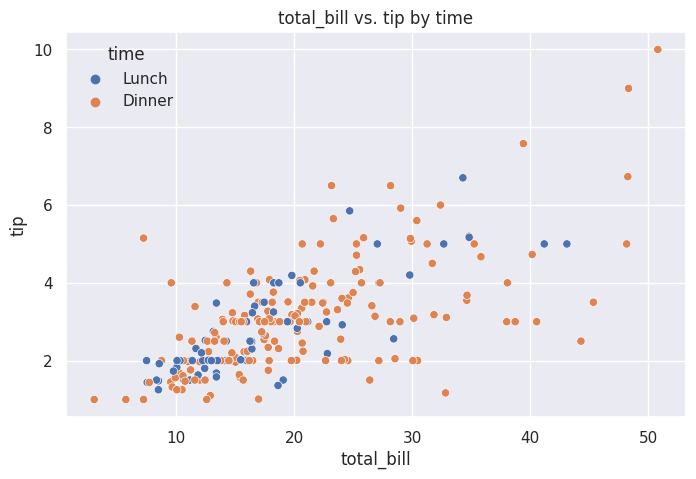

In [ ]:
# категориальный признак добавляется через параметр hue
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', hue = 'time')
plt.title('total_bill vs. tip by time');

Мы можем констатировать, что при сохранении взаимосвязи как в обеденное, так и в вечернее время, за ужином минимальная и максимальное сумма чека, а также разброс чаевых выше.

### pairplot

График pairplot позволяет визуализировать взаимосвязи сразу нескольких количественных переменных. В библиотеке Pandas такой график строится с помощью функции pd.plotting.scatter_matrix().

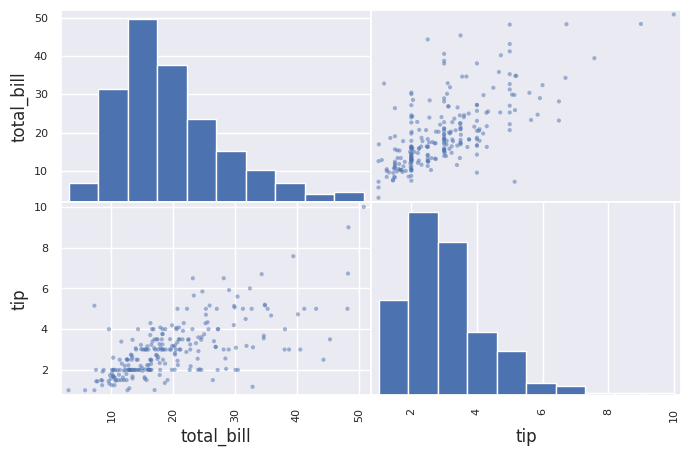

In [ ]:
# построим pairplot в библиотеке Pandas
# в качестве данных возьмем столбцы total_bill и tip датасета tips
pd.plotting.scatter_matrix(tips[['total_bill', 'tip']]);

там, где перемекаются разные признаки, строится точечная диаграмма, на пересечении одного и того же признака по главной диагонали — его гистограмма.

Примерно такой же график можно построить с помощью функции sns.pairplot() 

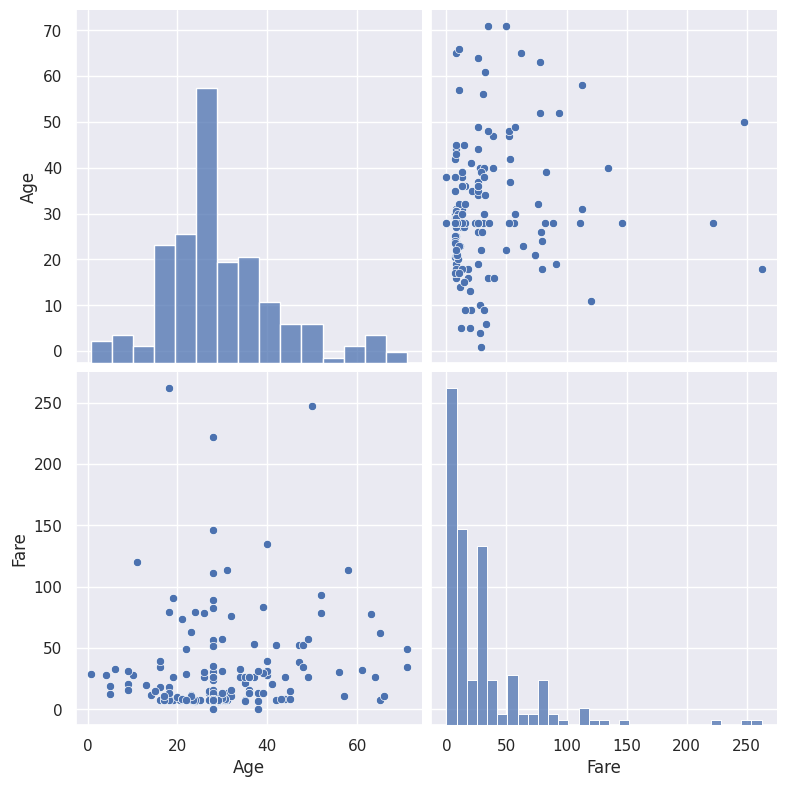

In [ ]:
# построим pairplot в библиотеке Seaborn
# параметр height функции pairplot() задает высоту каждого графика в дюймах
sns.pairplot(titanic[['Age', 'Fare']].sample(frac = 0.2, random_state = 42), height = 4);

Обратите внимание на метод .sample() с параметром frac = 0,2, который мы применили к датафрейму titanic. Таким образом, мы сделали случайную выборку из 20%  наблюдений.

In [ ]:
# метод .sample() с параметром frac = 0.2 позволяет взять случайные 20% наблюдений
# параметр random_state обеспечивает воспроизводимость результата
titanic[['Age', 'Fare']].sample(frac = 0.2, random_state = 42)

Age     Fare
709  28.0  15.2458
439  31.0  10.5000
840  20.0   7.9250
720   6.0  33.0000
39   14.0  11.2417
..    ...      ...
852   9.0  15.2458
433  17.0   7.1250
773  28.0   7.2250
25   38.0  31.3875
84   17.0  10.5000

[178 rows x 2 columns]

Метод .sample() в данном случае применяется для того, чтобы ускорить создание pairplot. Зачастую, при наличии большого числа наблюдений, график может строиться очень долго.

При добавлении параметра hue (разделение по категориальной переменной) гистограмма по умолчанию превращается в график плотности.

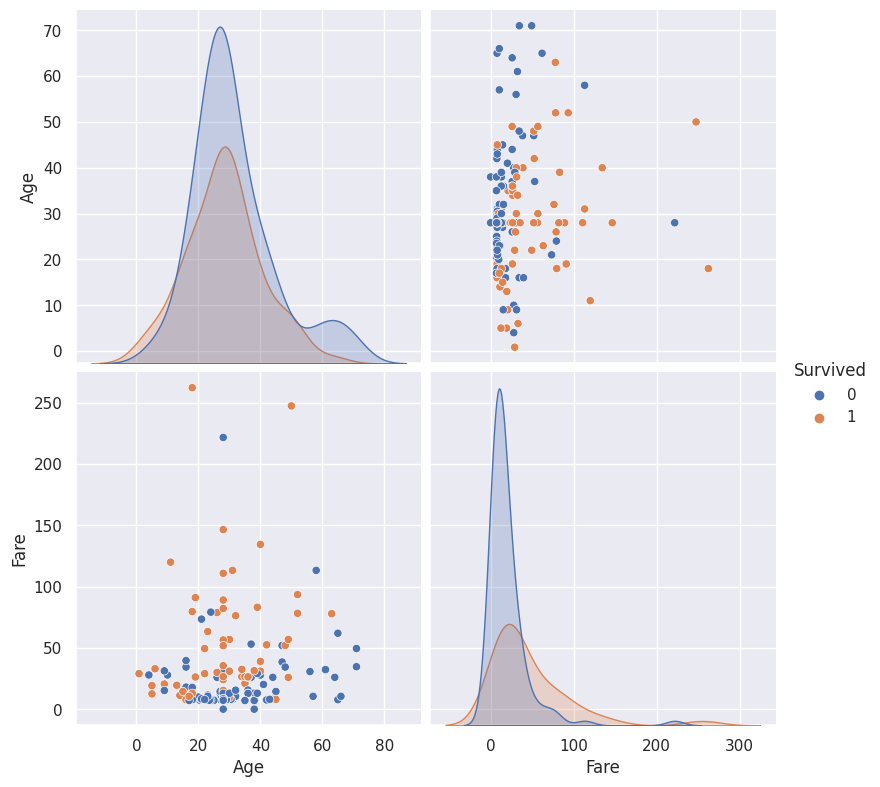

In [ ]:
# при добавлении параметра hue (категориальной переменной) гистограмма по умолчанию превращается в график плотности
# обратите внимание, столбец Survived мы добавили и в параметр hue и в датафрейм с данными 
sns.pairplot(titanic[['Age', 'Fare', 'Survived']].sample(frac = 0.2, random_state = 42),
             hue = 'Survived', 
             height = 4);

с помощью такого графика мы пытаемся ответить на вопрос, есть ли взаимосвязь между возрастом пассажиров и стоимостью их билетов в разрезе выживаемости.

Функция sns.pairplot() является надстройкой (упрощенной версией) другой функции , sns.PairGrid(). Ее стоит использовать, если требуются более продвинутые настройки графика pairplot.

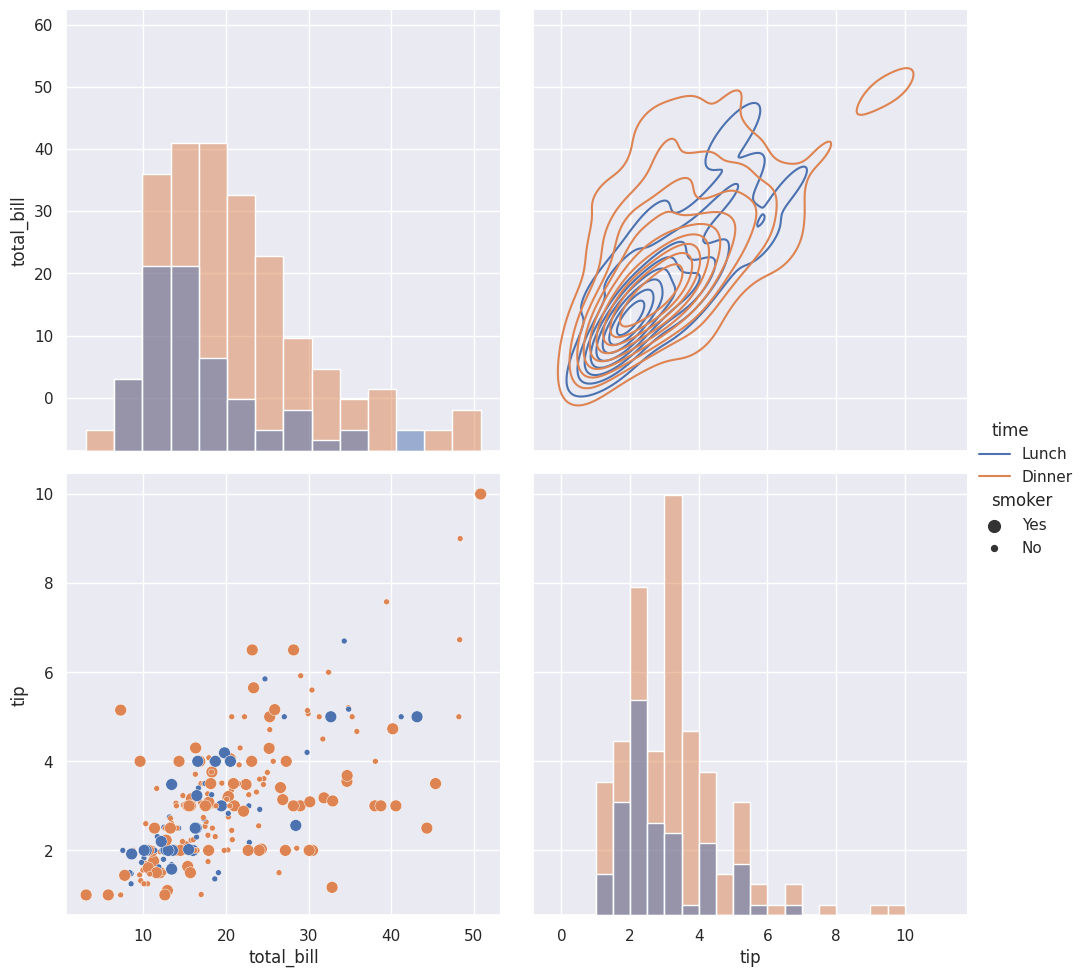

In [ ]:
# создадим объект класса PairGrid, в качестве данных передадим ему
# как количественные, так и категориальные переменные
g = sns.PairGrid(tips[['total_bill', 'tip', 'time', 'smoker']],
                 # передадим в hue категориальный признак, который мы будем различать цветом
                 hue = 'time',
                 # зададим размер каждого графика
                 height = 5)

# метод .map_diag() с параметром sns.histplot выдаст гистограммы на диагонали
g.map_diag(sns.histplot)

# слева и снизу от диагонали мы выведем точечные диаграммы и зададим
# дополнительный категориальный признак smoker с помощью размера точек графика
g.map_lower(sns.scatterplot, size = tips['smoker'])

# справа и сверху будет график плотности сразу двух количественных признаков
g.map_upper(sns.kdeplot)

# добавим легенду, adjust_subtitles = True делает текст легенды более аккуратным
g.add_legend(title = '', adjust_subtitles = True);

При построении таких сложных графиков важно помнить про их информативность. В примере выше некоторые графики (например, точечную диаграмму) уже достаточно сложно анализировать.

### jointplot

График плотности (kde plot) двух количественных признаков (верхний справа в примере выше) представляет собой визуализацию совместного распределения (joint distribution) двух количественных признаков (tip и total_bill) с разделением по категориальному признаку (time). Другими словами, мы смотрим на то, как изменяется распределение одного количественного признака под воздействием другого. И так для каждой из двух категорий.

В результате мы получаем графики изолиний (contour lines), которые показывают, что между суммой чека и чаевыми есть взаимосвязь (если бы ее не было, изолинии представляли бы собой круги). 

Вначале построим точно такой же график плотности (kde plot) совместного распределения tip и total_bill с разделением по признаку time. Для этого функции sns.jointplot() передадим данные и укажем параметр kind = ‘kde’.

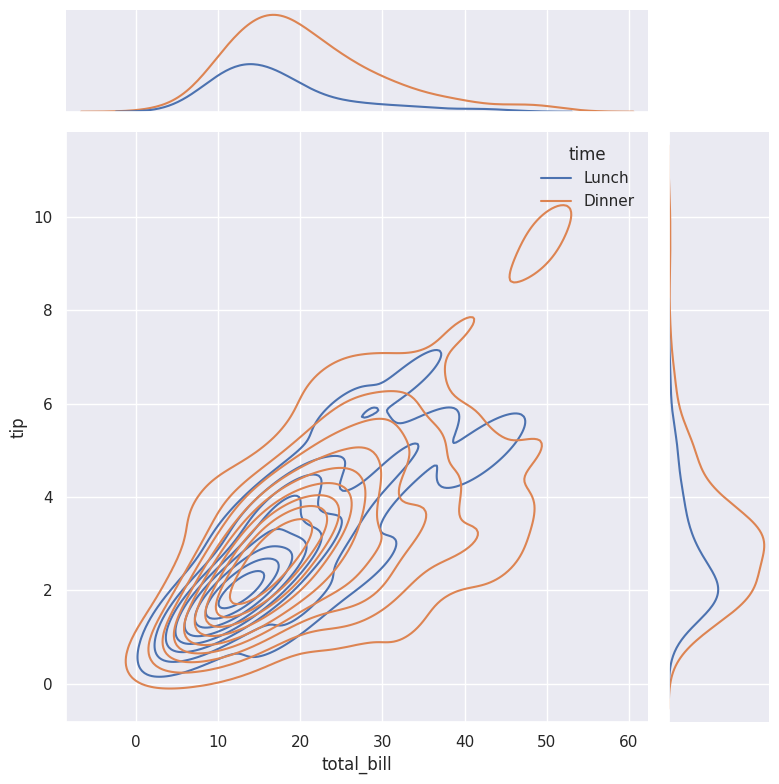

In [ ]:
# построим график плотности совместного распределения
sns.jointplot(data = tips, # передадим данные
              x = 'total_bill', # пропишем количественные признаки,
              y = 'tip', 
              hue = 'time', # категориальный признак,
              kind = 'kde', # тип графика
              height = 8); # и его размер

По краям мы видим графики плотности так называемого безусловного распределения (marginal distribution) каждого из признаков. Это одномерные распределения (univariate distribution). Основной график показывает совместное распределение (joint distribution) уже двух переменных. Это двумерное распределение (bivariate distribution).

Возможно более интуитивным покажется использование точечной диаграммы (kind = ‘scatter’) вместо графика плотности.

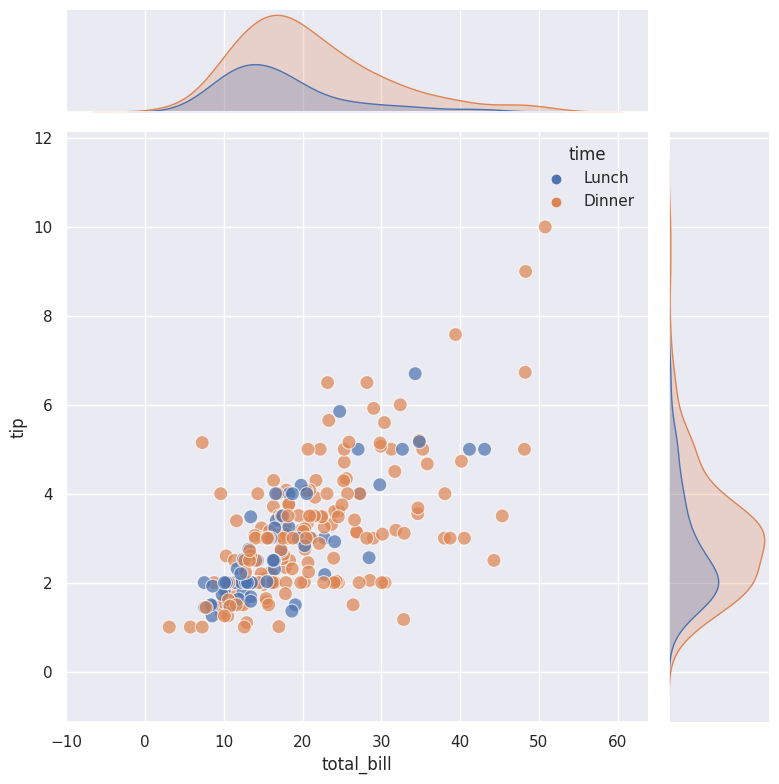

In [ ]:
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              hue = 'time',
              # построим точечную диаграмму
              kind = 'scatter',
              # дополнительно укажем размер точек
              s = 100,
              # и их прозрачность
              alpha = 0.7,
              height = 8);

Кроме того, мы можем построить линию регрессии, проходящую через точки. Правда в этом случае придется отказаться от параметра hue, разделять данные на категории и одновременно строить линию регрессии sns.jointplot() не умеет.

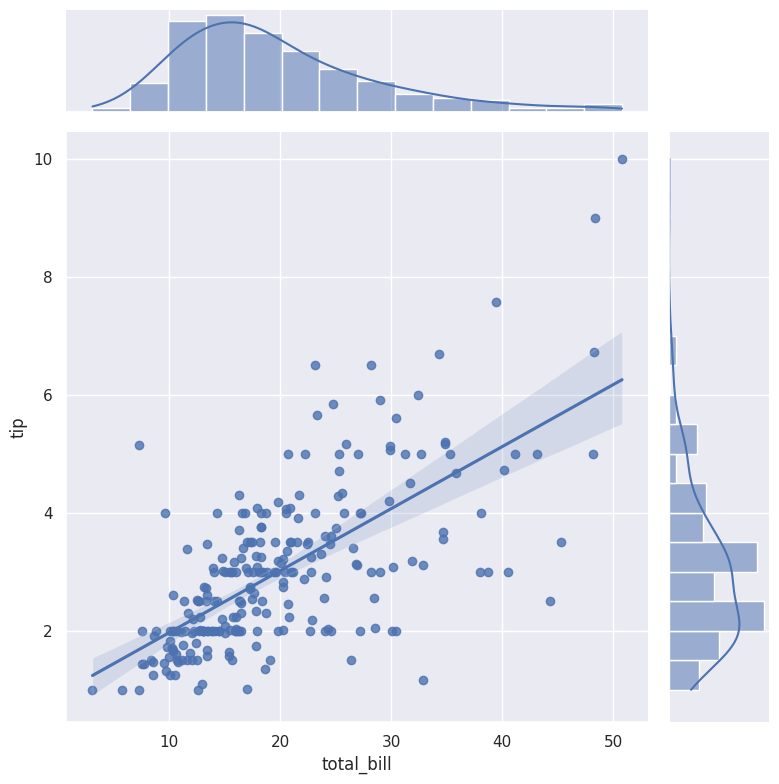

In [ ]:
# для построения линии регрессии на данных
# используем параметр kind = 'reg'
sns.jointplot(data = tips,
              x = 'total_bill',
              y = 'tip',
              kind = 'reg',
              height = 8);

### heatmap

 если мы хотим вывести какие-либо статистические показатели взаимосвязи двух количественных переменных (например, корреляцию), это можно сделать с помощью чисел. Выведем корреляционную матрицу между total_bill и tip с помощью метода .corr().

In [ ]:
# выведем корреляционную матрицу между total_bill и tip
tips[['total_bill', 'tip']].corr()

total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000

Или с помощью цвета. Во втором случае мы будем строить то, что называется тепловой картой (heatmap). Поместим созданную выше корреляционную матрицу в функцию sns.heatmap().

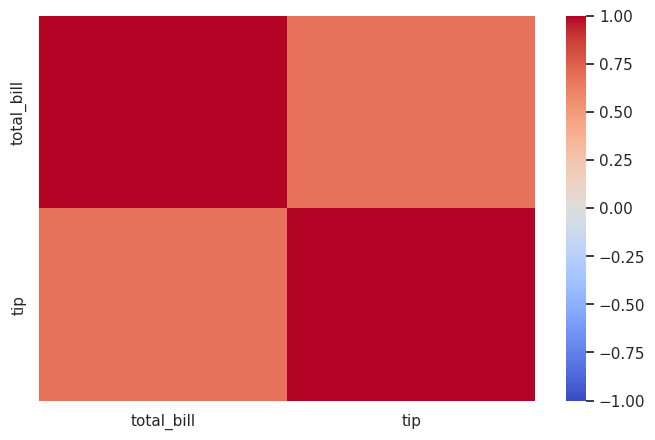

In [ ]:
# поместим корреляционную матрицу в функцию sns.heatmap()
sns.heatmap(tips[['total_bill', 'tip']].corr(),
            # дополнительно пропишем цветовую гамму
            cmap= 'coolwarm',
            # и зададим диапазон от -1 до 1
            vmin = -1, vmax = 1);

Более насыщенный красный цвет (верхняя граница шкалы) демонстрирует корреляцию признака с самим собой, менее насыщенный — достаточно сильную положительную корреляцию признаков.

## Sweetviz

Рассмотрим еще одну библиотеку, которая позволяет не просто сравнивать количественные и качественные переменные в датасете, а сразу сравнивать два датасета. Зачастую, сравнение двух датасетов имеет смысл, когда перед нами обучающая и тестовая выборки.

Скачаем и подгрузим в сессионное хранилище тестовую часть датасета «Титаник».

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sweetviz as sv

In [ ]:
# импортируем обучающую и тестовую выборки
train = pd.read_csv('https://raw.githubusercontent.com/vn322/Cod_future/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/vn322/Cod_future/main/test.csv')

Передадим оба датасета в функцию sv.compare(). Эта функция создаст объект DataframeReport, к которому мы сможем применить метод .show_notebook() для выведения результата.

In [ ]:
# передадим оба датасета в функцию sv.comparison()
comparison = sv.compare(train, test)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:84: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning:

The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use 

In [ ]:
# посмотрим на тип созданного объекта
type(comparison)

sweetviz.dataframe_report.DataframeReport

Количественные переменные
По большому счету мы получаем информацию о каждой из переменных в разрезе двух датафреймов. Обратимся к столбцу Age.

количественная переменная в Sweetviz
В отчете есть информация о присутствующих (values) и отсутствующих значениях (missing), количестве уникальных (distinct) и нулевых (zeroes) значений. Кроме того, мы видим базовые статистические показатели и гистограмму распределения переменной в каждом из датафреймов.

Отдельно стоит отметить выявление взаимосвязи:

для двух количественных переменных используется коэффициент корреляции Пирсона (Pearson correlation coefficient); и здесь мы видим, что корреляция возраста со столбцами Fare и PassengerId ожидаемо близка к нулю
для выявления взаимосвязи между количественной и качественной переменными используется корреляционное отношение (correlation ratio); например, мы видим, что возраст в некоторой степени связан с классом пассажира Pclass
Качественные переменные
Обратимся к столбцу Sex.

качественная переменная в Sweetviz
В первую очередь отметим, что программа самостоятельно определила, что речь идет именно о категориальном признаке. Для его визуализации была построена столбчатая диаграмма с разбивкой по обучающей и тестовой выборке. Кроме того, мы можем количественно оценить значения в каждой из категорий.

Для поиска же взаимосвязи между двумя категориальными переменными используется коэффициент неопределенности (uncertainty coefficient) или U Тиля, и мы видим некоторую связь с целевой переменной Survived. Для количественной и качественной переменных по-прежнему используется корреляционное отношение.


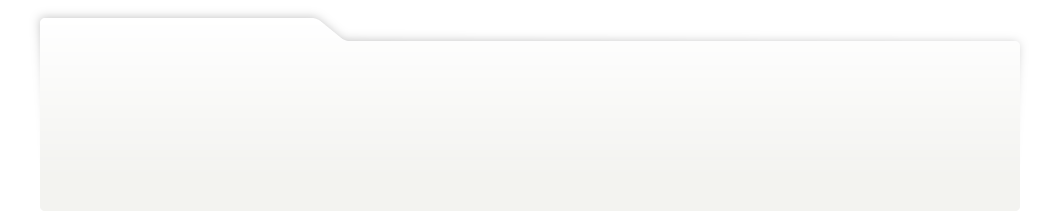
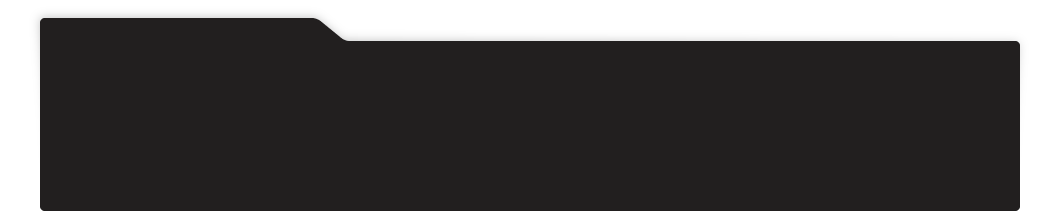
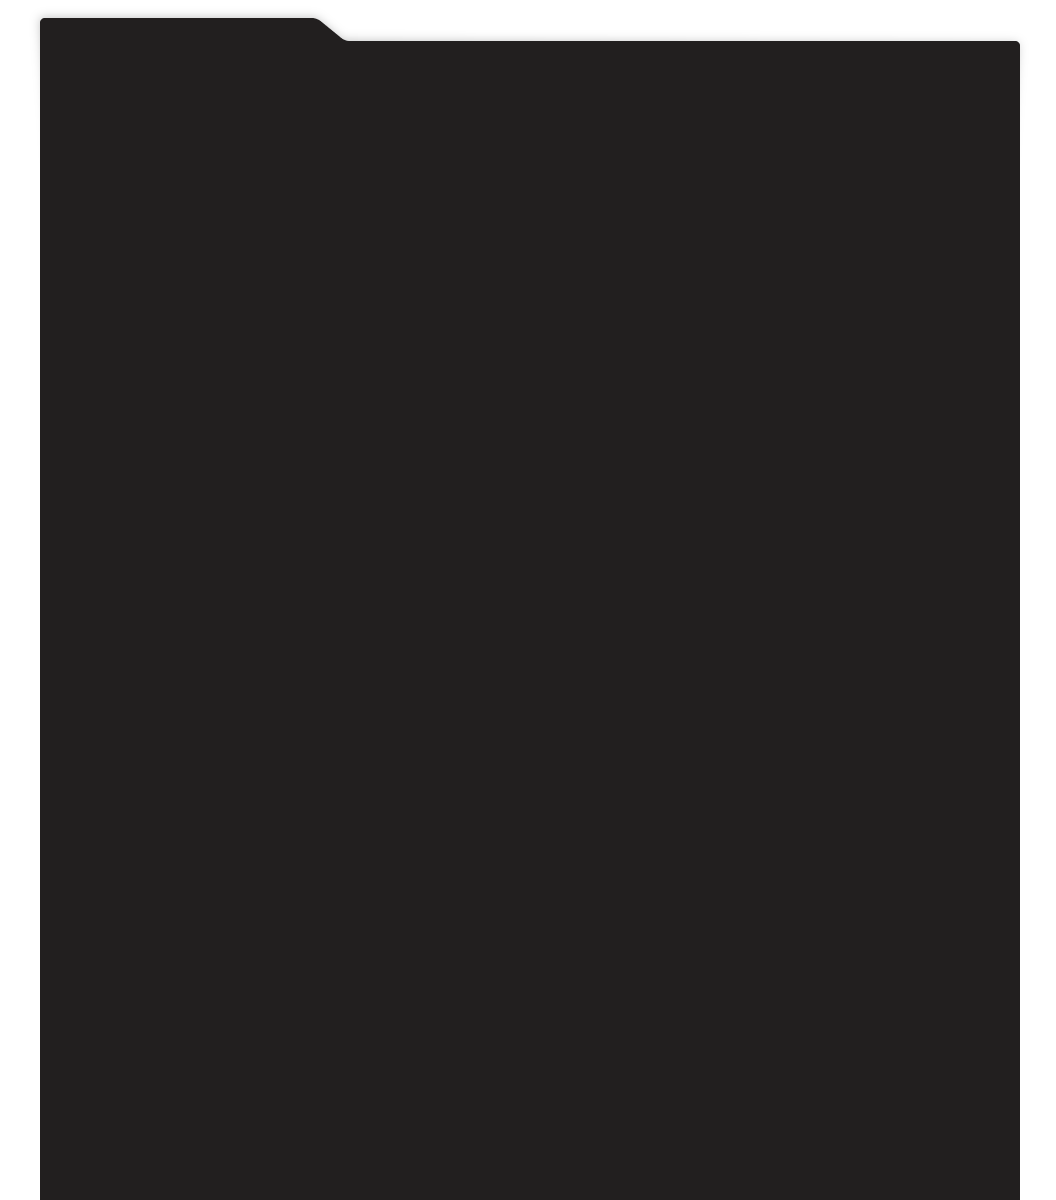
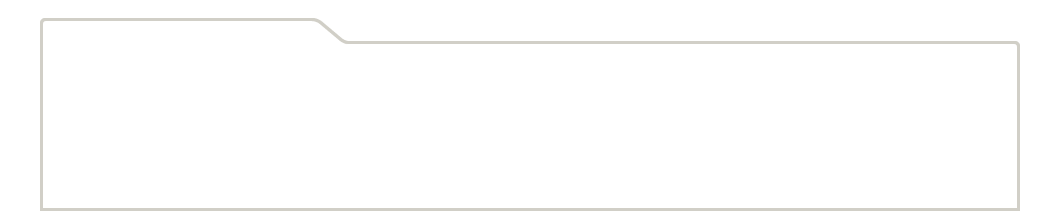
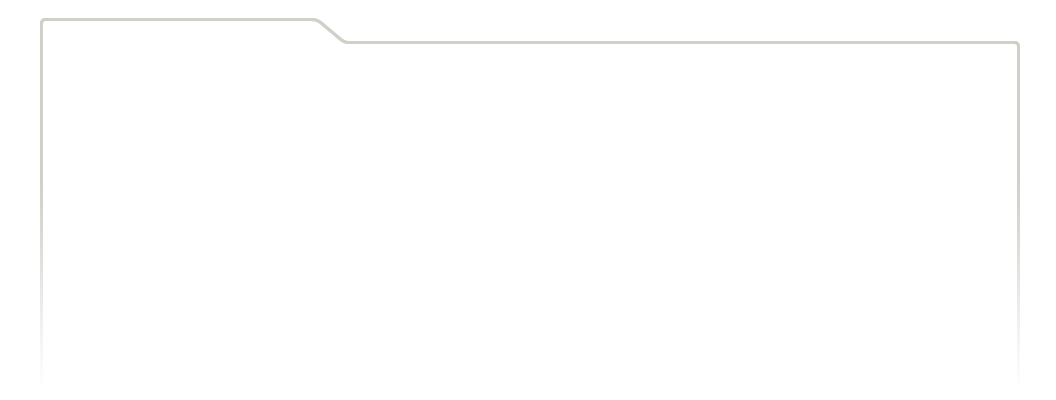
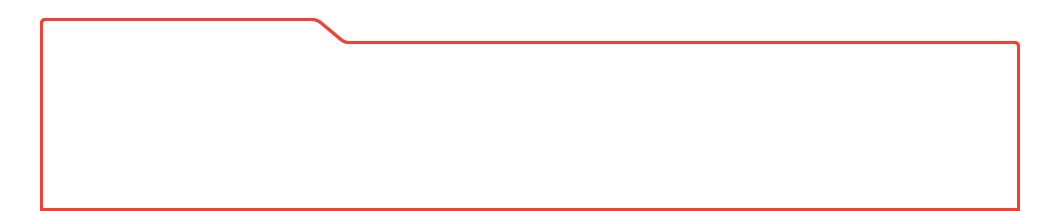
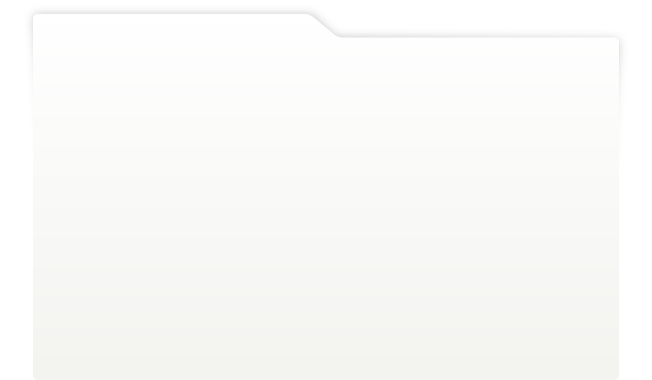
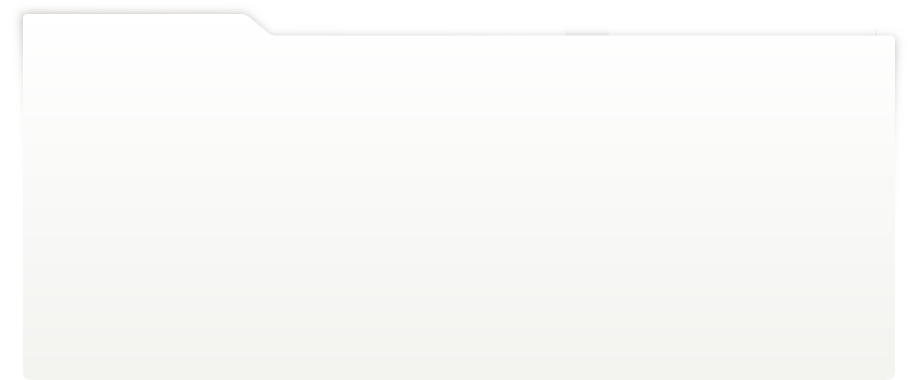
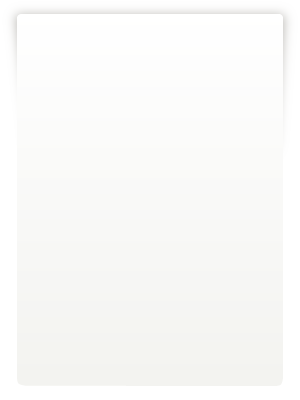
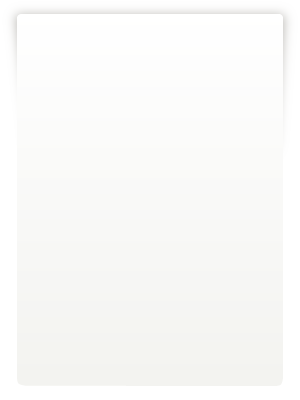
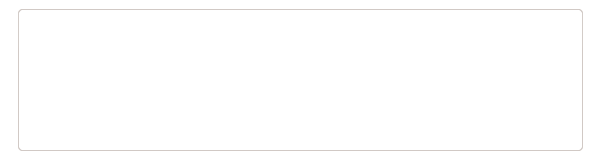
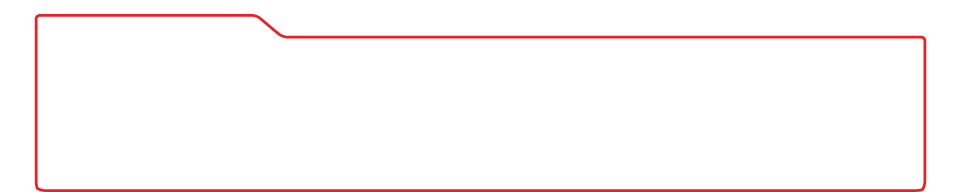
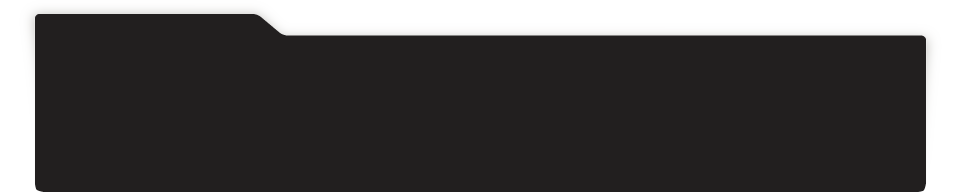
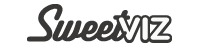
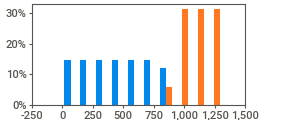
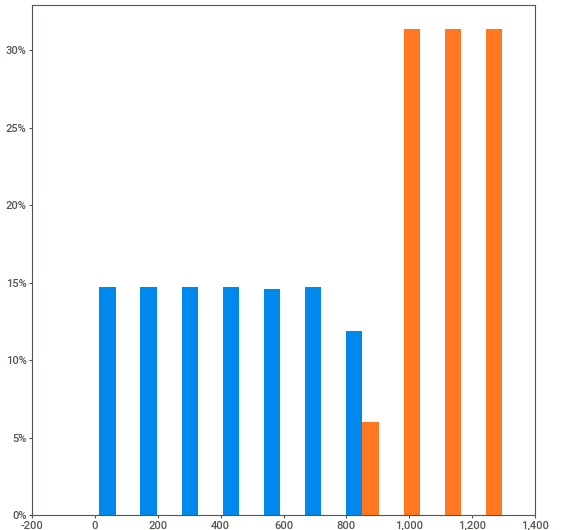
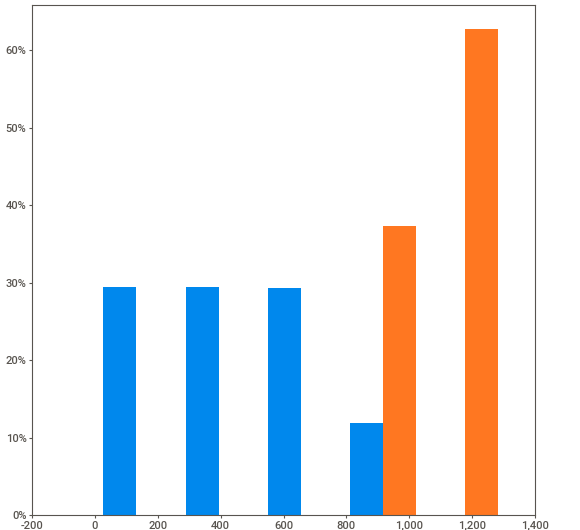
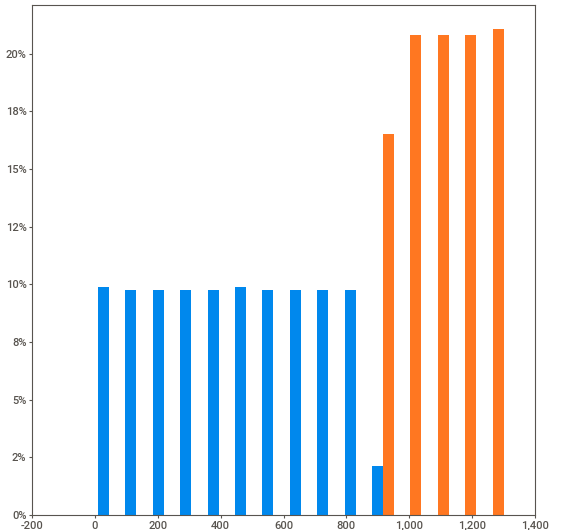
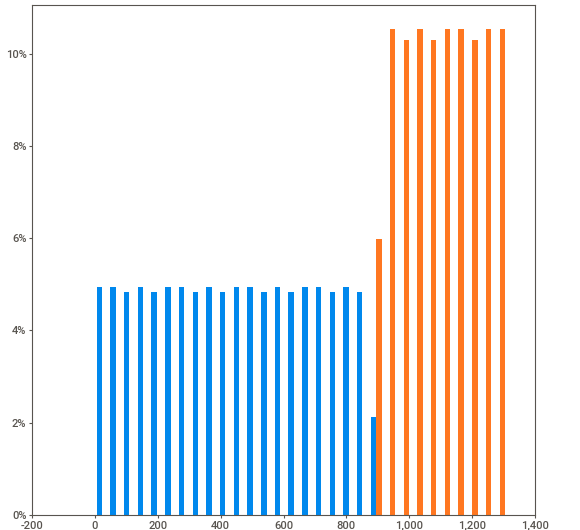
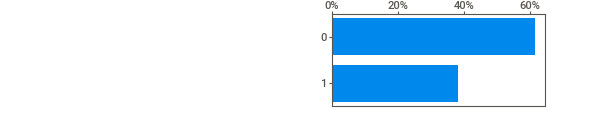
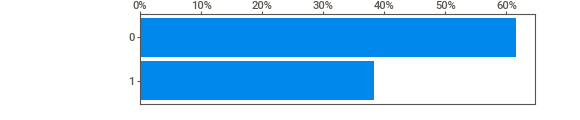
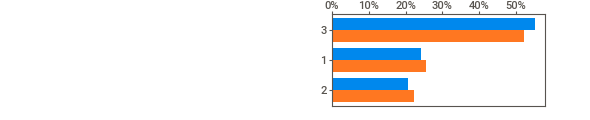
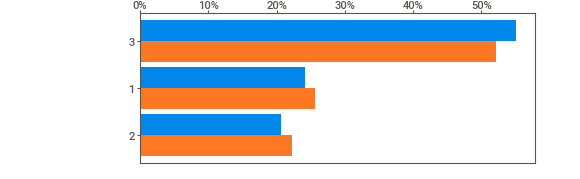
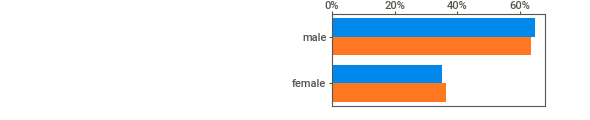
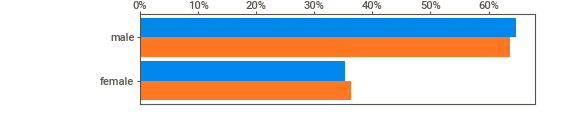
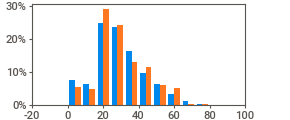
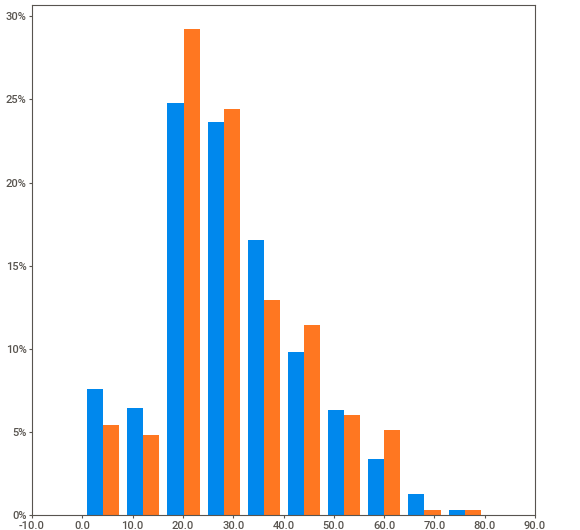
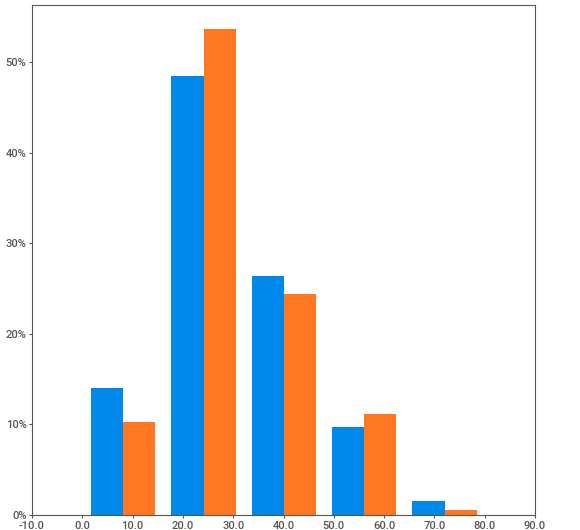
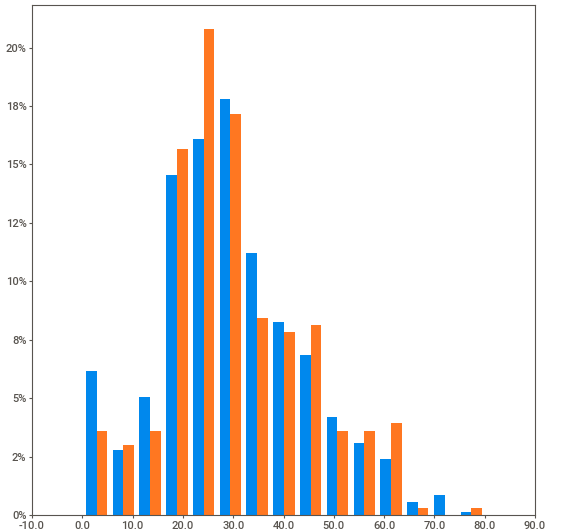
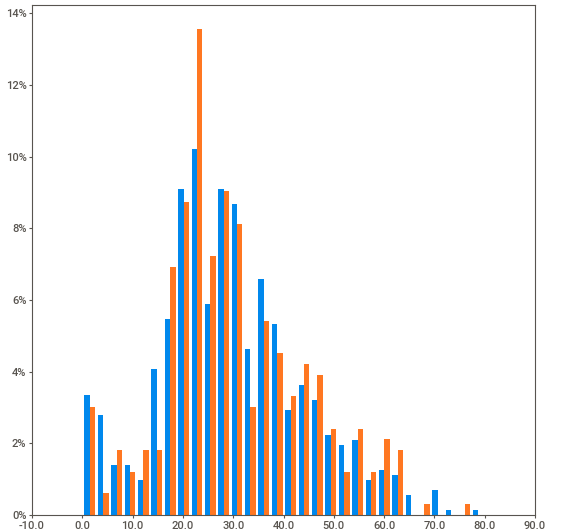
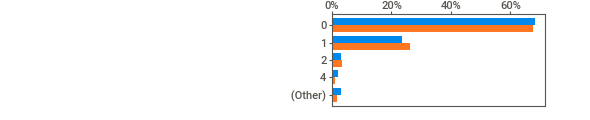
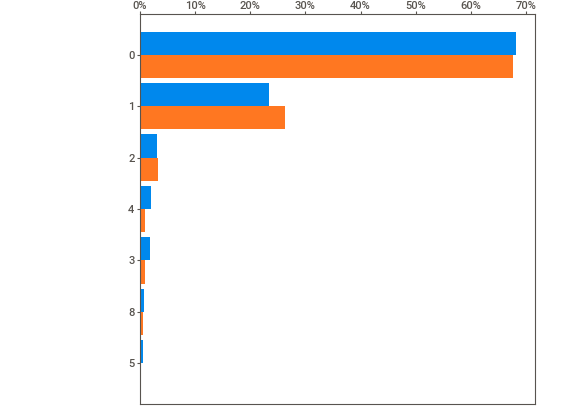
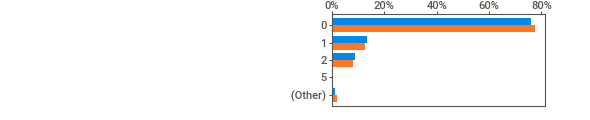
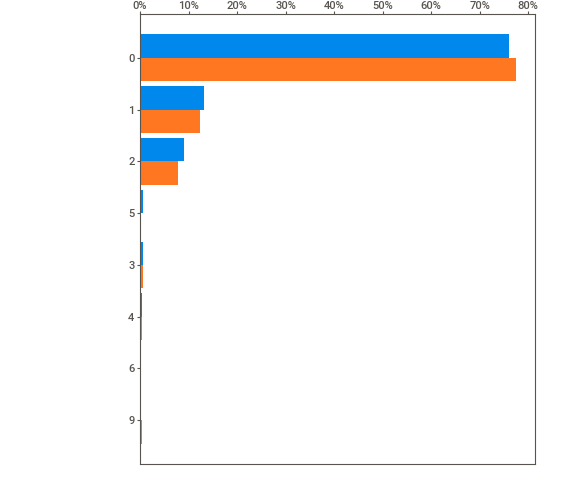
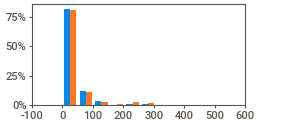
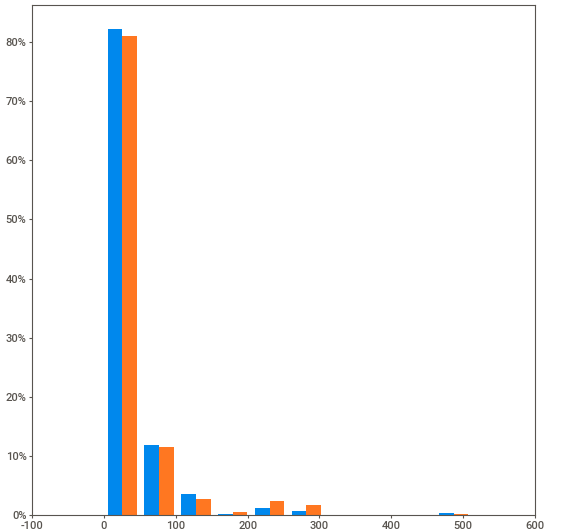
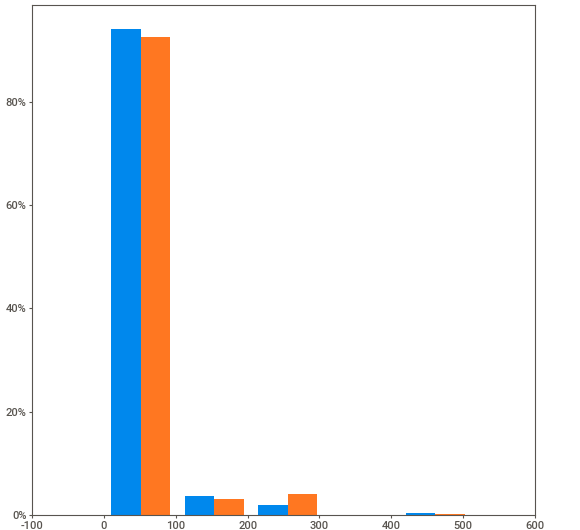
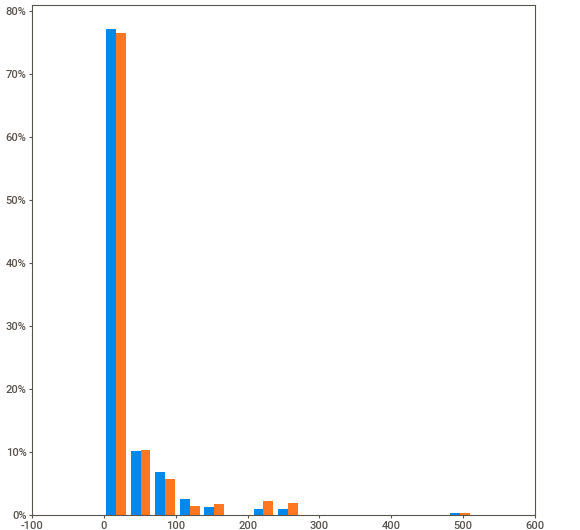
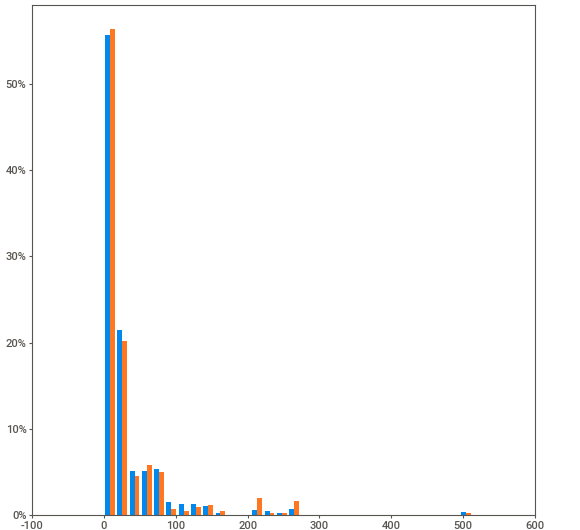
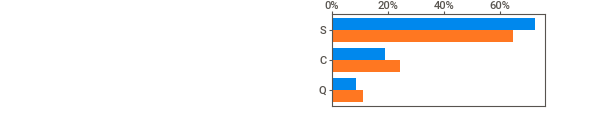
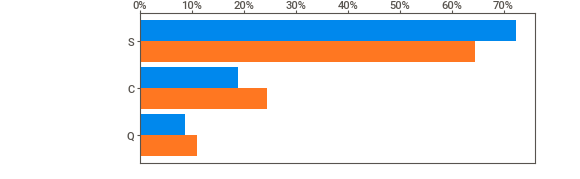
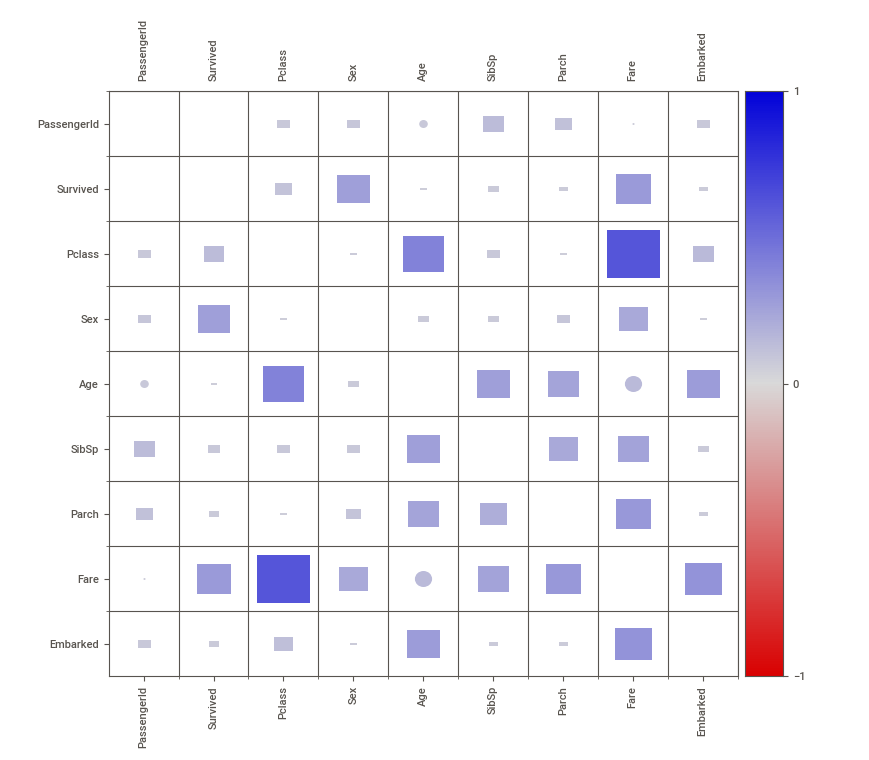
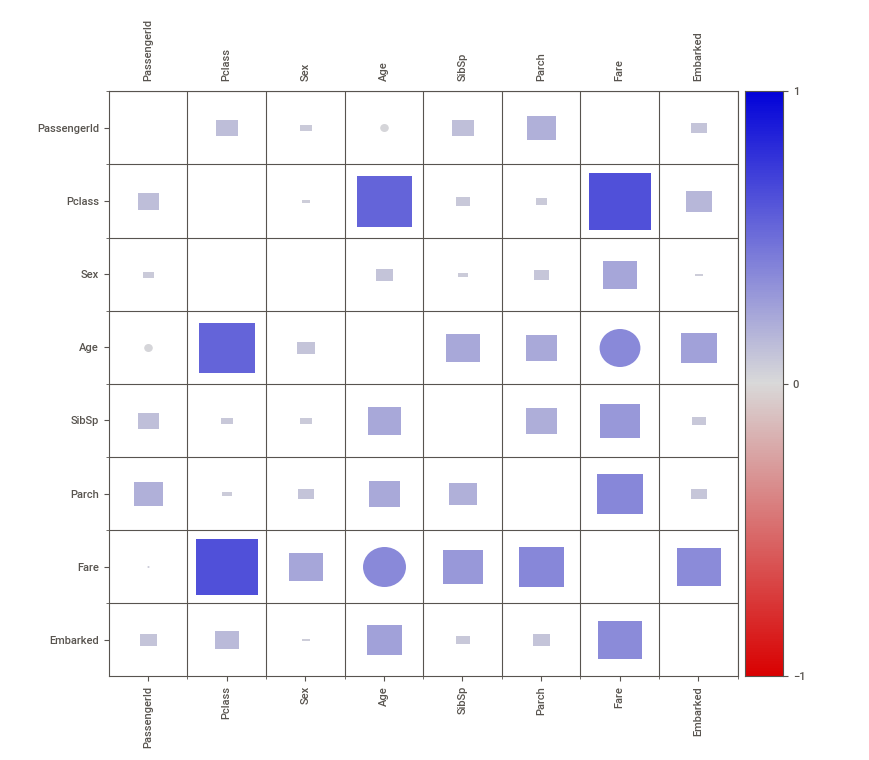

In [ ]:
# применим метод .show_notebook()
comparison.show_notebook()

## Приложение 
### Возможности кастомизации графиков в Matplotlib

### Стиль графика

In [ ]:
# создадим последовательность для оси x
x = np.linspace(0, 10, 100)

In [ ]:
# снова зададим размеры графиков и одновременно установим стиль Seaborn
sns.set(rc = {'figure.figsize' : (8, 5)})

#### Цвет графика

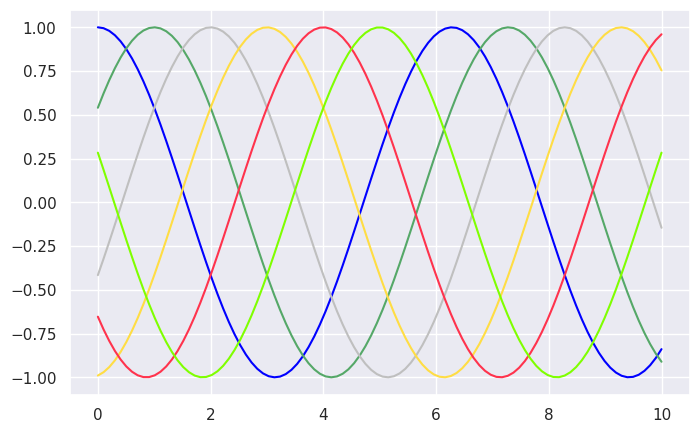

In [ ]:
# создадим несколько графиков функции косинуса со сдвигом 
# и зададим цвет каждого графика одним из доступных в Matplotlib способов
plt.plot(x, np.cos(x - 0), color = 'blue')        # по названию
plt.plot(x, np.cos(x - 1), color = 'g')           # по короткому названию (rgbcmyk)
plt.plot(x, np.cos(x - 2), color = '0.75')        # оттенки серого от 0 до 1
plt.plot(x, np.cos(x - 3), color = '#FFDD44')     # HEX код (RRGGBB от 00 до FF)
plt.plot(x, np.cos(x - 4), color = (1.0,0.2,0.3)) # RGB кортеж, значения от 0 до 1
plt.plot(x, np.cos(x - 5), color = 'chartreuse'); # CSS название цветов

#### Тип линии графика

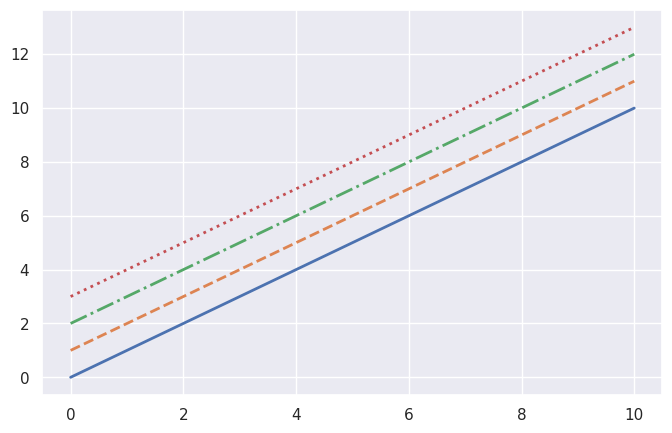

In [ ]:
# посмотрим на возможный тип линии графика
plt.plot(x, x + 0, linestyle = 'solid', linewidth = 2)
plt.plot(x, x + 1, linestyle = 'dashed', linewidth = 2)
plt.plot(x, x + 2, linestyle = 'dashdot', linewidth = 2)
plt.plot(x, x + 3, linestyle = 'dotted', linewidth = 2);

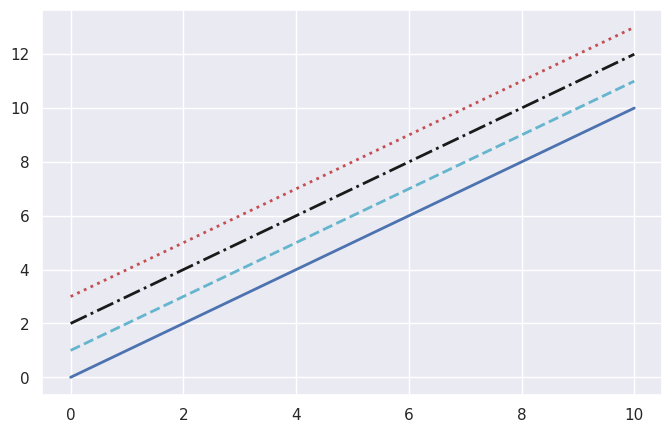

In [ ]:
# создадим различные линии с помощью строки форматирования
plt.plot(x, x + 0, '-b', linewidth = 2)  # сплошная синяя линия (по умолчанию)
plt.plot(x, x + 1, '--c', linewidth = 2) # штриховая линия цвета морской волны (cyan)
plt.plot(x, x + 2, '-.k', linewidth = 2) # черная (key) штрихпунктирная линия
plt.plot(x, x + 3, ':r', linewidth = 2); # красная линия из точек

#### Стиль точечной диаграммы

In [ ]:
# зададим точку отсчета
np.random.seed(42)
# и последовательность из 10-ти случайных целых чисел от 0 до 10
y = np.random.randint(10, size = 10)

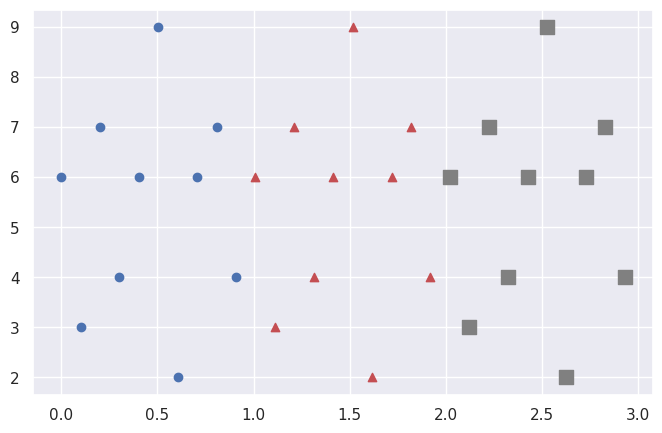

In [ ]:
# выведем первые 10 наблюдений в виде синих (b) кругов (o)
plt.scatter(x[:10], y, c = 'b', marker = 'o')
# выведем вторые 10 наблюдений в виде красных (r) треугольников (^)
plt.scatter(x[10:20], y, c = 'r', marker = '^')
# выведем третьи 10 наблюдений в виде серых (0.50) квадратов (s)
# дополнительно укажем размер квадратов s = 100
plt.scatter(x[20:30], y, c = '0.50', marker = 's', s = 100);

#### Стиль графика в целом

In [ ]:
# посмотрим на доступные стили
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

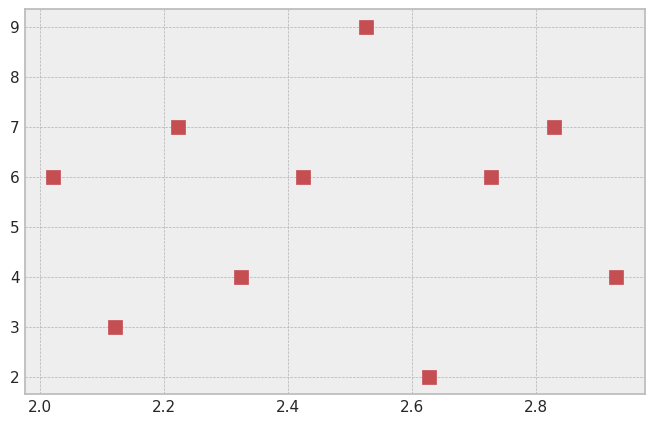

In [ ]:
# применим стиль bmh
plt.style.use('bmh')

# и создадим точечную диаграмму с квадратными красными маркерами размера 100
plt.scatter(x[20:30], y, s = 100, c = 'r', marker = 's');

In [ ]:
# вернем ноутбук к "заводским" настройкам (стиль default)
# такой стиль тоже есть, хоть он и не указан в перечне plt.style.available
plt.style.use('default')

# дополнительно пропишем размер последующих графиков
matplotlib.rcParams['figure.figsize'] = (5, 4)
matplotlib.rcParams['figure.figsize']

[5.0, 4.0]

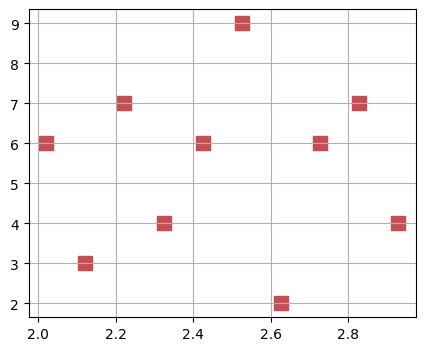

In [ ]:
# дополним белый прямоугольник сеткой и снова выведем график
plt.grid()
plt.scatter(x[20:30], y, s = 100, c = 'r', marker = 's');

### Пределы шкалы и деления осей графика

#### Пределы шкалы

Способ 1. Функции `plt.xlim()` и `plt.ylim()`

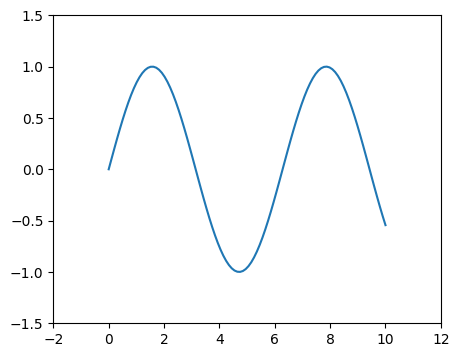

In [ ]:
# выведем график функции синуса
plt.plot(x, np.sin(x))

# пропишем пределы шкалы по обеим осям
plt.xlim(-2, 12)
plt.ylim(-1.5, 1.5);

Способ 2. Функция `plt.axis()`

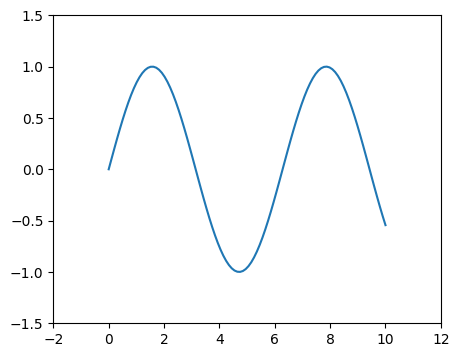

In [ ]:
# выведем график функции синуса
plt.plot(x, np.sin(x))

# зададим пределы графика с помощью функции plt.axis()
# передадим параметры в следующей очередности: xmin, xmax, ymin, ymax
plt.axis([-2, 12, -1.5, 1.5]);

#### Деления

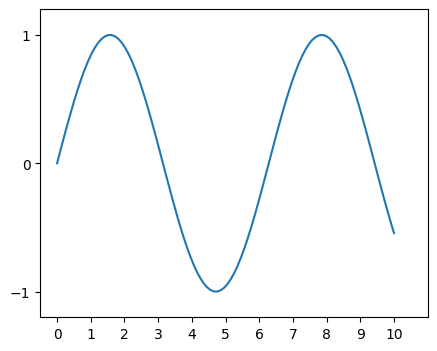

In [ ]:
# построим синусоиду и зададим график ее осей
plt.plot(x, np.sin(x))
plt.axis([-0.5, 11, -1.2, 1.2])

# создадим последовательность от 0 до 10 с помощью функции np.arange()
# и передадим ее в функцию plt.xticks()
plt.xticks(np.arange(11))

# в функцию plt.yticks() передадим созданный вручную список
plt.yticks([-1, 0, 1]);

### Подписи, легенда и размеры графика

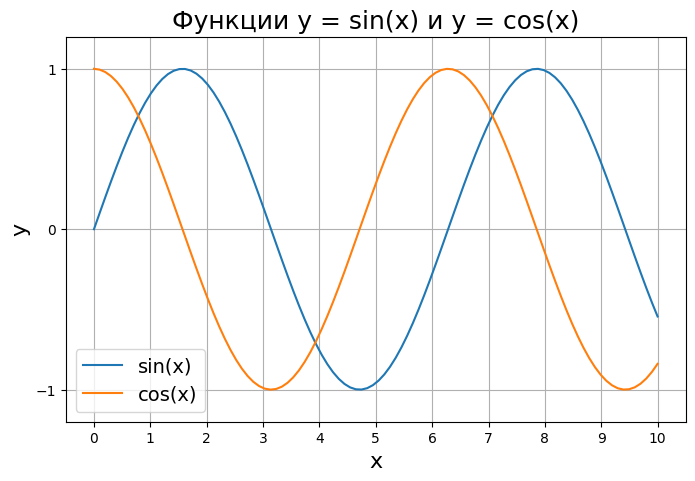

In [ ]:
# зададим размеры отдельного графика (лучше указывать в начале кода)
plt.figure(figsize = (8,5))

# добавим графики синуса и косинуса с подписями к кривым
plt.plot(x, np.sin(x), label = 'sin(x)')
plt.plot(x, np.cos(x), label = 'cos(x)')

# выведем легенду (подписи к кривым) с указанием места на графике и размера шрифта
plt.legend(loc = 'lower left', prop = {'size': 14})

# добавим пределы шкал по обеим осям,
plt.axis([-0.5, 10.5, -1.2, 1.2])

# а также деления осей графика
plt.xticks(np.arange(11))
plt.yticks([-1, 0, 1])

# добавим заголовок и подписи к осям с указанием размера шрифта
plt.title('Функции y = sin(x) и y = cos(x)', fontsize = 18)
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)

# добавим сетку
plt.grid()

# выведем результат
plt.show()

### `plt.figure()` и `plt.axes()`

In [ ]:
plt.style.use('seaborn-whitegrid')

<ipython-input-239-adcf1482bdd0>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



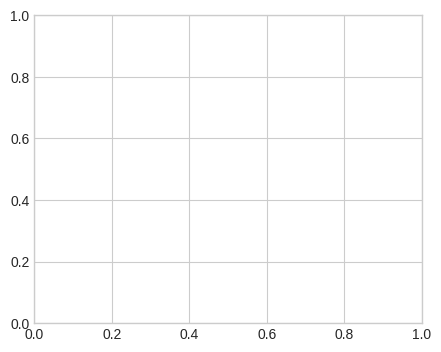

In [ ]:
# создадим объект класса plt.figure()
fig = plt.figure()

# создадим объект класса plt.axes()
ax = plt.axes()

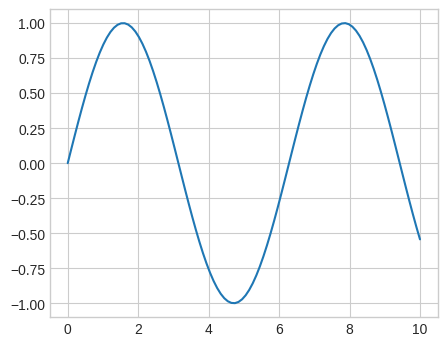

In [ ]:
# создадим объект класса plt.figure()
fig = plt.figure()

# создадим объект класса plt.axes()
ax = plt.axes()

# добавим синусоиду к объекту ax с помощью метода .plot()
ax.plot(x, np.sin(x));

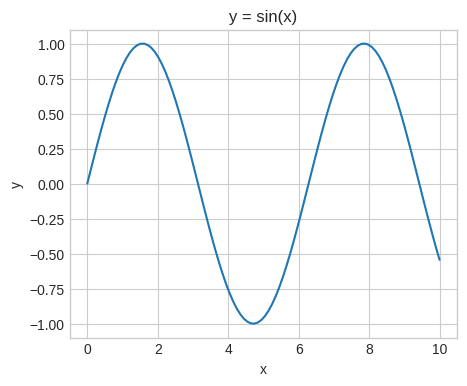

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x))

# используем методы класса plt.axes()
ax.set_title('y = sin(x)')
ax.set_xlabel('x')
ax.set_ylabel('y');

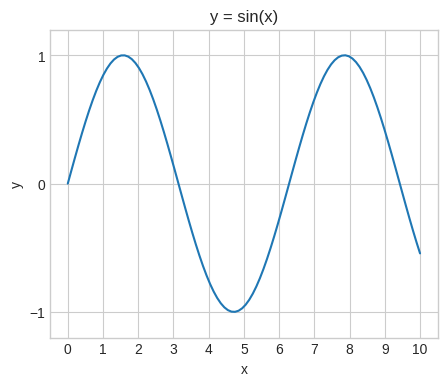

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x))

# применим метод .set() и укажем необходимые параметры
ax.set(title = 'y = sin(x)',
       xlabel='x', ylabel = 'y',
       xlim = (-0.5, 10.5), ylim = (-1.2, 1.2),
       xticks = (np.arange(11)),
       yticks = [-1, 0, 1]);

### Построение подграфиков

#### Создание вручную

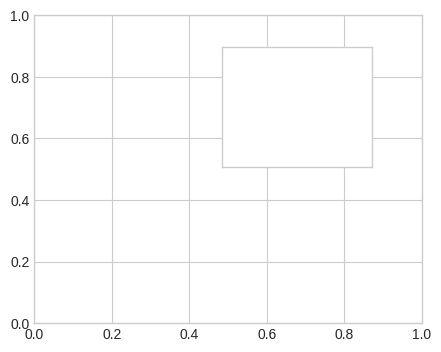

In [ ]:
# создадим объект fig,
fig = plt.figure()

# стандартный подграфик,
ax1 = plt.axes()

# и подграфик по следующим координатам и размерам
ax2 = plt.axes([0.5, 0.5, 0.3, 0.3])

# дополнительно покажем, как можно убрать деления на "вложенном" подграфике
ax2.set(xticks = [], yticks = []);

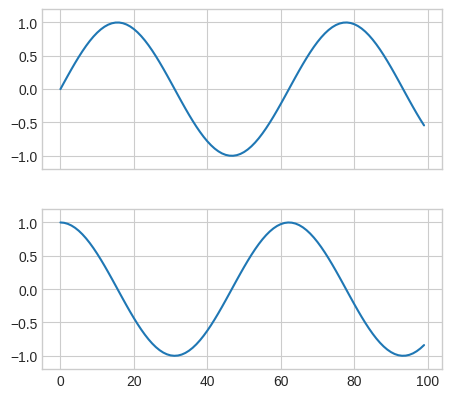

In [ ]:
# создадим объект класса plt.figure()
fig = plt.figure()

# зададим координаты угла [0.1, 0.6] и размеры [0.8, 0.4] верхнего подграфика,
# дополнительно зададим пределы шкалы по оси y и уберем шкалу по оси x
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4],
                   ylim = (-1.2, 1.2),
                   xticklabels = [])

# добавим координаты угла [[0.1, 0.1] и размеры [0.8, 0.4] нижнего подграфика
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim = (-1.2, 1.2))

# выведем на них синусоиду и косинусоиду соответственно
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

#### Метод `.add_subplot()`

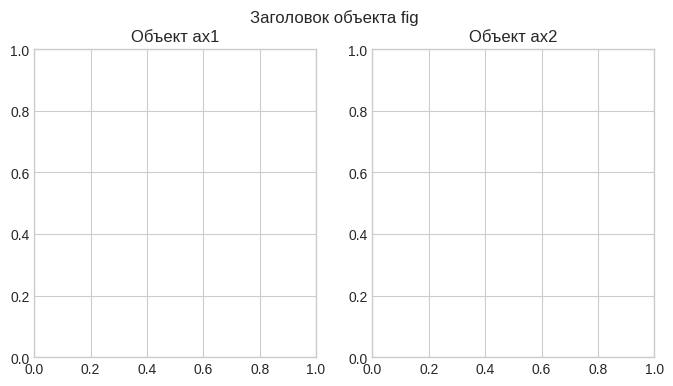

In [ ]:
# создаем объект figure, задаем размер объекта,
fig = plt.figure(figsize = (8,4))
# указываем общий заголовок через метод .suptitle()
fig.suptitle('Заголовок объекта fig') # можно использовать plt.suptitle('Заголовок объекта fig')

# внутри него создаем объект ax1, прописываем сетку из одной строки и двух столбцов
# и положение (индекс) ax1 в сетке
ax1 = fig.add_subplot(1, 2, 1)
# используем метод .set_title() для создания заголовка объекта ax1
ax1.set_title('Объект ax1')

# создаем и наполняем объект ax2
# запятые для значений сетки не обязательны, а заголовок можно передать параметром
ax2 = fig.add_subplot(122, title = 'Объект ax2')

plt.show()

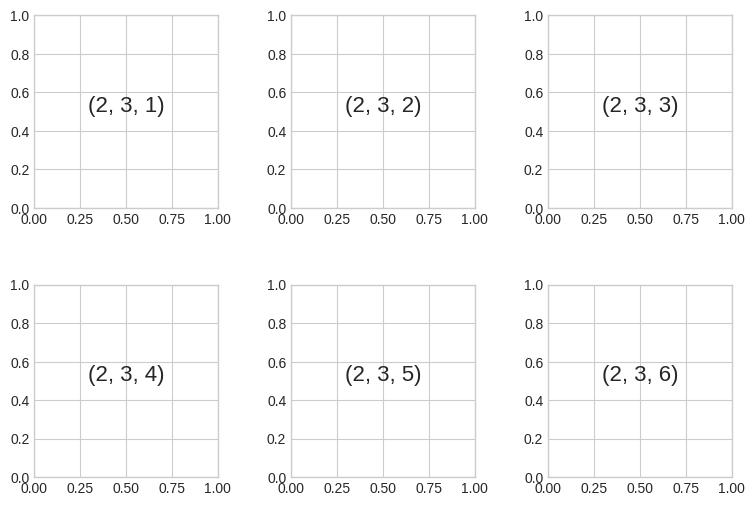

In [ ]:
# создадим объект figure и зададим его размер
fig = plt.figure(figsize = (9, 6))
# укажем горизонтальное и вертикальное расстояние между графиками
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

# в цикле от 1 до 6 (так как у нас будет шесть подграфиков)
for i in range(1, 7):
  # поочередно создадим каждый подграфик
  # первые два параметра задают сетку, в переменной i содержится индекс подграфика
  ax = fig.add_subplot(2, 3, i)
  # метод .text() позволяет написать текст в заданном месте подграфика
  ax.text(0.5, 0.5,       # разместим текст в центре
          str((2, 3, i)), # выведем параметры сетки и индекс графика
          fontsize = 16,  # зададим размер текста
          ha = 'center')  # сделаем выравнивание по центру

#### Функция `plt.subplots()`

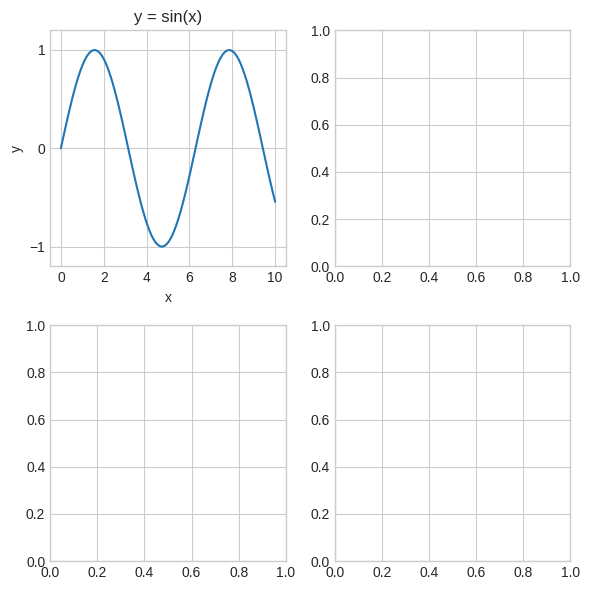

In [ ]:
# создаем объекты fig и ax
# в параметрах указываем число строк и столбцов, а также размер фигуры
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (6,6))

# с помощью индекса объекта ax заполним левый верхний график
ax[0, 0].plot(x, np.sin(x))

# через метод .set() задаем параметры графика
ax[0, 0].set(title = 'y = sin(x)',
             xlabel = 'x', ylabel = 'y',
             xlim = (-0.5, 10.5), ylim = (-1.2, 1.2),
             xticks = (np.arange(0, 11, 2)),
             yticks = [-1, 0, 1])

plt.tight_layout();

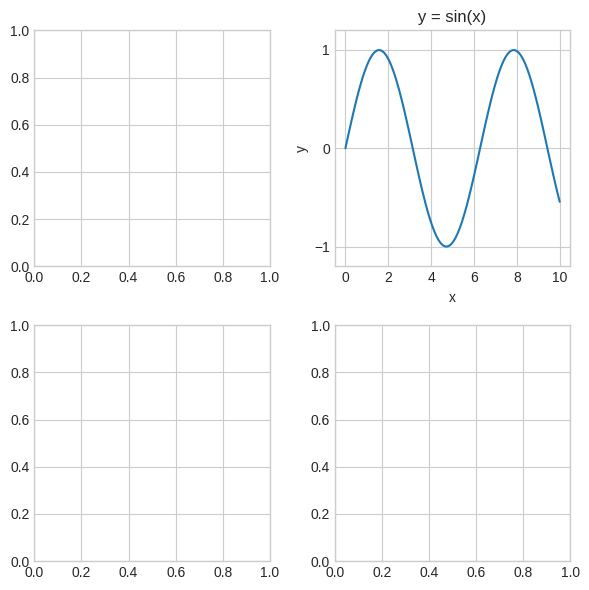

In [ ]:
# передадим подграфики в соответствующие переменные
# в первых внутренних скобках - первая строка, во вторых - вторая
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (6, 6))

# поместим функцию np.sin(x) во второй столбец первой строки
ax2.plot(x, np.sin(x))
ax2.set(title = 'y = sin(x)',
        xlabel='x', ylabel = 'y',
        xlim = (-0.5, 10.5), ylim = (-1.2, 1.2),
        xticks = (np.arange(0, 11, 2)),
        yticks = [-1, 0, 1])

plt.tight_layout();

In [ ]:
# возьмем данные о продажах в четырех магазинах
sales = pd.DataFrame({'year' :    [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009],
                      'store 1' : [35, 43, 76, 31, 46, 33, 26, 22, 23, 35],
                      'store 2' : [31, 40, 66, 25, 46, 34, 23, 22, 27, 35],
                      'store 3' : [33, 41, 66, 35, 34, 37, 27, 28, 22, 38],
                      'store 4' : [35, 45, 61, 27, 42, 38, 25, 29, 24, 31]
                      })

# сделаем столбец year индексом
sales.set_index('year', inplace = True)

# посмотрим на данные
sales

store 1  store 2  store 3  store 4
year                                    
2000       35       31       33       35
2001       43       40       41       45
2002       76       66       66       61
2003       31       25       35       27
2004       46       46       34       42
2005       33       34       37       38
2006       26       23       27       25
2007       22       22       28       29
2008       23       27       22       24
2009       35       35       38       31

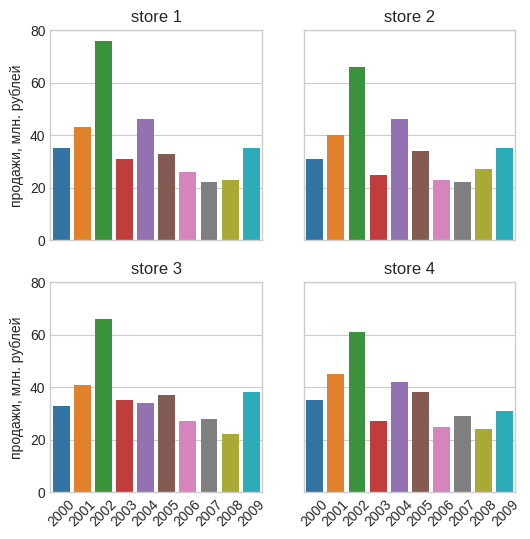

In [ ]:
# определимся с количеством строк и столбцов
nrows, ncols = 2, 2
# создадим счетчик для столбцов
col = 0

# создадим объекты fig и ax (в ax уже будет четыре подграфика)
# дополнительно, помимо размера, зададим общую шкалу по обеим осям
fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (6,6), sharex = True, sharey = True)

# в цикле пройдемся по строкам
for i in range(nrows):
  # затем во вложенном цикле - по столбцам
  for j in range(ncols):
    # для каждой комбинации i и j (координат подграфика) выведем столбчатую диаграмму Seaborn
    # по оси x - годы, по оси y - соответстующий столбец (магазин)
    # в параметр ax мы передадим текущий подграфик с координатами
    sns.barplot(x = sales.index, y = sales.iloc[:, col], ax = ax[i, j])

    # дополнительно в методе .set() зададим заголовок подграфика,
    # уберем подпись к оси x и зададим единые для всех подграфиков пределы по оси y
    ax[i, j].set(title = sales.columns[col], xlabel = '', ylim = (0, 80))
    # в качестве делений шкалы по оси x зададим годы и повернем их на 45 градусов
    ax[i, j].set_xticklabels(sales.index, rotation = 45)

    # общая шкала по осям предполагает общие деления, но не общую подпись,
    # чтобы подпись оси y была только слева от первого столбца, выведем ее при j == 0
    # (индекс j как раз отвечает за столбцы)
    if j == 0:
      ax[i, j].set_ylabel('продажи, млн. рублей')
    # в противном случае выведем пустую подпись
    else:
      ax[i, j].set_ylabel('')

    # обновим счетчик столбцов
    col += 1

# выведем результат
plt.show()

#### Метод `.plot()` библиотеки Pandas

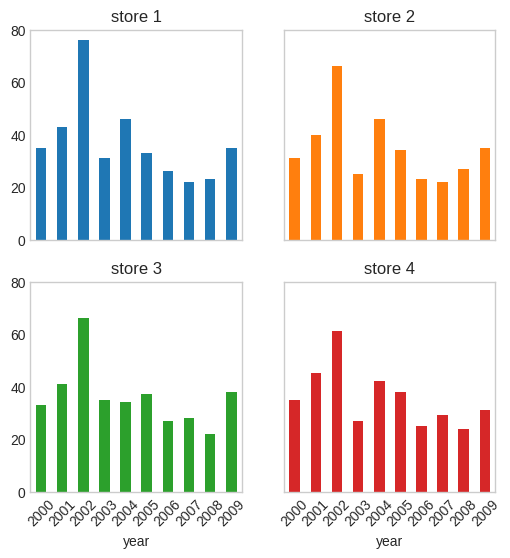

In [ ]:
# применим метод .plot() ко всем столбцам датафрейма
sales.plot(subplots = True,   # укажем, что хотим создать подграфики
           layout = (2,2),    # пропишем размерность сетки
           kind = 'bar',      # укажем тип графика
           figsize = (6,6),   # зададим размер фигуры
           sharey = True,     # сделаем общую шкалу по оси y
           ylim = (0, 80),    # зададим пределы по оси y
           grid = False,      # уберем сетку
           legend = False,    # уберем легенду
           rot = 45);         # повернем подписи к делениям по оси x на 45 градусов

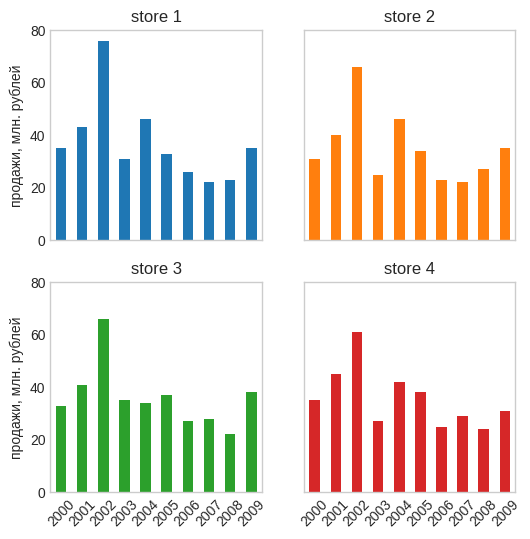

In [ ]:
# зададим размер строк и столбцов
nrows, ncols = 2, 2

ax = sales.plot(subplots = True,         # укажем, что хотим создать подграфики
                layout = (nrows, ncols), # пропишем размерность сетки
                kind = 'bar',            # укажем тип графика
                figsize = (6,6),         # зададим размер фигуры
                sharey = True,           # сделаем общую шкалу по оси y
                ylim = (0, 80),          # зададим пределы по оси y
                grid = False,            # уберем сетку
                legend = False,          # уберем легенду
                rot = 45);               # повернем подписи к делениям по оси x на 45 градусов

# пройдемся по индексам столбцов и строк
for i in range(nrows):
  for j in range(ncols):

    # удалим подписи к оси x
    ax[i, j].set_xlabel('')

    # сделаем подписи по оси y только к первому столбцу
    if j == 0:
      ax[i, j].set_ylabel('продажи, млн. рублей')
    else:
      ax[i, j].set_ylabel('')

In [ ]:
# продемонстрируем, как выглядят индексы подграфиков
# при использовании вложенных циклов
for i in range(nrows):
  for j in range(ncols):
    print(i,j)

0 0
0 1
1 0
1 1
